In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic' #->한글 안깨지게

In [2]:
june = pd.read_csv("june.csv",encoding = 'cp949',low_memory =False)

In [3]:
july = pd.read_csv("july.csv", encoding = 'cp949', low_memory =False)

In [4]:
august = pd.read_csv("august.csv", encoding = 'cp949', low_memory = False)

In [5]:
df = pd.concat([june, july,august], ignore_index=True)
df

,strd_date,strd_tizn_val,ctpr_nm,ccg_nm,adn_dgnm,adng_no,cardc_nm,tpbuz_cd,tpbuz_nm,bth_yr,sex_cd,trns_cnt,ttl_trns_amt
0,20220601,0,부산광역시,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350
1,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700
2,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500
3,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700
4,20220601,0,부산광역시,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27135155,20220801,0,부산광역시,영도구,동삼1동,21040650,코나,4020,슈퍼마켓,1958,M,1,30000
27135156,20220801,0,부산광역시,영도구,동삼1동,21040650,코나,8013,주점,1998,M,1,59600
27135157,20220801,0,부산광역시,영도구,동삼1동,21040650,코나,8399,기타음료식품,1998,F,1,7500
27135158,20220801,0,부산광역시,영도구,동삼1동,21040650,하나,4010,편 의 점,1971,F,2,7600


In [6]:
print("june", len(june))
print("july", len(july))
print("august", len(august))
s = len(june) + len(july) + len(august)
s #6,7,8 월 총 개수

june 10061735
july 9756266
august 7317159


27135160

In [7]:
#열 이름 변환
df = df.rename(columns = {'strd_date':'기준일자', 'strd_tizn_val':'기준시간대값', 'ctpr_nm':'시도명', 'ccg_nm':'시군구명', 'adn_dgnm':'행정동명',
       'adng_no':'행정동번호', 'cardc_nm':'카드사명', 'tpbuz_cd':'업종코드', 'tpbuz_nm':'업종명', 'bth_yr':'출생년도', 'sex_cd':'성별코드',
       'trns_cnt':'거래건수', 'ttl_trns_amt':'총거래금액'})

In [9]:
#결측치 없음
df.isnull().sum()

기준일자      0
기준시간대값    0
시도명       0
시군구명      0
행정동명      0
행정동번호     0
카드사명      0
업종코드      0
업종명       0
출생년도      0
성별코드      0
거래건수      0
총거래금액     0
dtype: int64

In [39]:
# 중복값 없음
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27135160 entries, 0 to 27135159
Data columns (total 13 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   기준일자    int64 
 1   기준시간대값  int64 
 2   시도명     object
 3   시군구명    object
 4   행정동명    object
 5   행정동번호   int64 
 6   카드사명    object
 7   업종코드    int64 
 8   업종명     object
 9   출생년도    int64 
 10  성별코드    object
 11  거래건수    int64 
 12  총거래금액   int64 
dtypes: int64(7), object(6)
memory usage: 2.6+ GB


In [11]:
#평균, 표준편차, quantile확인
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,기준일자,기준시간대값,행정동번호,업종코드,출생년도,거래건수,총거래금액
count,27135160.00,27135160.00,27135160.00,27135160.00,27135160.00,27135160.00,27135160.00
mean,20220704.85,14.67,21101816.97,6238.94,1977.28,1.10,22371.77
std,79.80,4.46,86158.80,2131.98,14.85,0.38,45778.45
min,20220601.00,0.00,21010510.00,1001.00,1921.00,1.00,1.00
25%,20220620.00,12.00,21060550.00,4020.00,1967.00,1.00,4400.00
50%,20220711.00,15.00,21090640.00,7050.00,1978.00,1.00,9000.00
75%,20220802.00,18.00,21120590.00,8006.00,1989.00,1.00,22000.00
max,20220831.00,23.00,21510330.00,9998.00,4607.00,71.00,2413460.00


# 변수 전체 EDA

## 기준시간대값

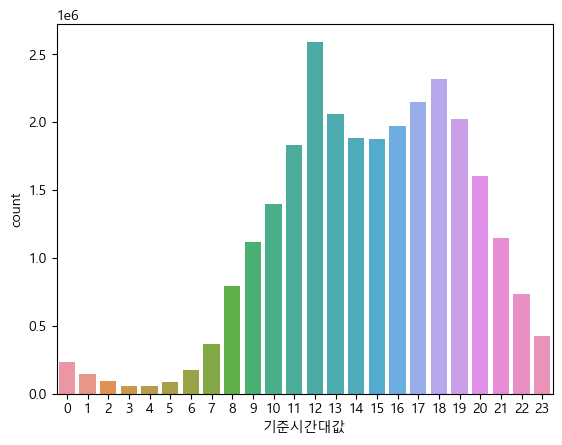

In [12]:
sns.countplot(data=df, x="기준시간대값")
plt.show()

12    2594249
18    2317544
17    2149852
13    2064385
19    2022080
16    1973444
14    1884563
15    1879940
11    1835542
20    1602146
10    1396157
21    1145898
9     1115819
8      790217
22     732863
23     423246
7      365718
0      236182
6      176698
1      141841
2       89931
5       84899
3       59274
4       52672
Name: 기준시간대값, dtype: int64


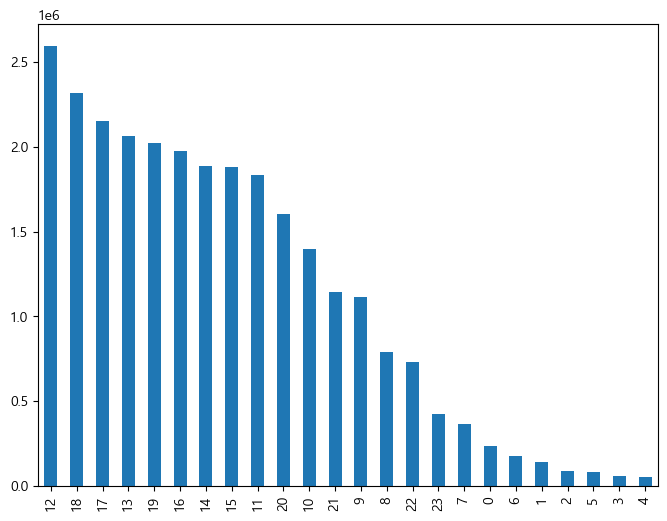

In [13]:
df.기준시간대값.value_counts().plot.bar(figsize=(8,6))
print(df.기준시간대값.value_counts())
#12시가 가장 많고, 그다음 18시가 많음

기준시간대값
0     15800.221231
1     15308.093027
2     13456.005671
3     12611.677762
4     12234.273485
5     15096.609548
6     16307.019044
7     13849.973302
8     11390.964790
9     17231.483060
10    21452.719178
11    21741.658069
12    20856.426570
13    22486.841356
14    24141.654250
15    24454.125137
16    24028.762438
17    23696.625822
18    24084.449644
19    26627.379888
20    26829.663347
21    23226.298644
22    19303.998476
23    17664.415345
Name: 총거래금액, dtype: float64

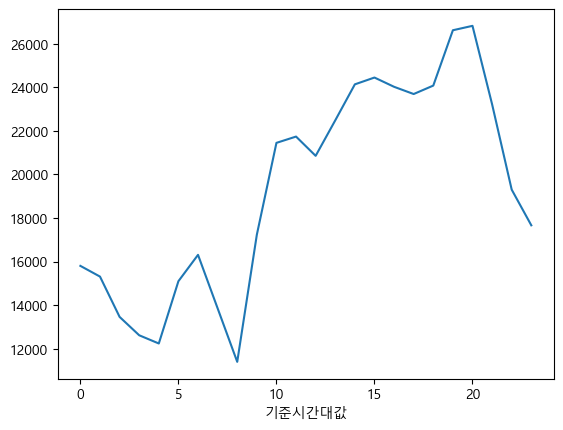

In [18]:
#시간대별 총 거래금액 평균 확인 -> 20시가 가장 많음
df.groupby(['기준시간대값'])['총거래금액'].mean().plot()
df.groupby(['기준시간대값'])['총거래금액'].mean()

## 시군구명

In [14]:
# 시군구명 별 갯수 확인
df['시군구명'].value_counts()

부산진구    3568514
해운대구    3075269
동래구     2504967
금정구     2151442
사하구     2004888
북구      1995622
연제구     1912041
남구      1881526
수영구     1595591
사상구     1489445
강서구     1336118
기장군      963690
동구       726398
서구       691524
중구       655696
영도구      582429
Name: 시군구명, dtype: int64

In [15]:
#정렬
sorted_numbers = sorted(df.groupby(['시군구명'])['총거래금액'].mean(), reverse=True)
print(sorted_numbers)  

#기장군이 가장 많음

[26240.252182755867, 26168.15913938739, 23914.713931366656, 23766.311139028978, 22606.101690417512, 22537.32074387266, 22494.44608361416, 22295.88654765281, 22084.73157652683, 21918.368514064292, 21336.540397767854, 20809.734704170976, 20321.696546316376, 19153.764236671468, 18813.496190793478, 18426.611664254357]


In [16]:
#시군구별 연령대 평균
df.groupby(['시군구명'])['출생년도'].mean()
#강서구 가장 낮고, 동래구가 가장 높아보임 -> 외부 데이터 이용하여 확인

시군구명
강서구    1978.97
금정구    1978.35
기장군    1977.32
남구     1977.95
동구     1976.92
동래구    1976.37
부산진구   1978.38
북구     1976.64
사상구    1977.13
사하구    1976.57
서구     1976.99
수영구    1977.07
연제구    1976.39
영도구    1975.77
중구     1977.46
해운대구   1976.85
Name: 출생년도, dtype: float64

## 행정동명

In [17]:
df.행정동명.unique()

array(['대청동', '중앙동', '동광동', '서대신3동', '서대신4동', '부민동', '아미동', '초장동', '충무동',
       '남부민1동', '암남동', '남부민2동', '초량1동', '초량2동', '범일1동', '남항동', '영선1동',
       '영선2동', '봉래1동', '청학1동', '청학2동', '동삼1동', '부전2동', '연지동', '초읍동',
       '양정1동', '양정2동', '전포2동', '당감2동', '당감4동', '가야2동', '개금1동', '개금2동',
       '가야1동', '부전1동', '전포1동', '수민동', '복산동', '온천1동', '온천2동', '사직2동',
       '사직3동', '안락1동', '안락2동', '명륜동', '대연3동', '대연4동', '대연5동', '대연6동',
       '용호1동', '용호2동', '용호3동', '용호4동', '용당동', '감만1동', '감만2동', '문현1동',
       '문현2동', '문현3동', '문현4동', '대연1동', '우암동', '구포1동', '구포2동', '구포3동',
       '금곡동', '화명1동', '덕천1동', '덕천2동', '덕천3동', '만덕1동', '만덕2동', '만덕3동',
       '화명2동', '화명3동', '중1동', '중2동', '송정동', '반여2동', '반여3동', '반송2동',
       '재송1동', '재송2동', '좌1동', '좌2동', '좌3동', '좌4동', '반여1동', '반여4동', '반송1동',
       '우1동', '우2동', '우3동', '괴정1동', '괴정2동', '괴정3동', '괴정4동', '당리동', '하단1동',
       '하단2동', '신평1동', '신평2동', '장림1동', '장림2동', '다대1동', '다대2동', '구평동',
       '감천1동', '감천2동', '서2동', '부곡1동', '부곡2동', '부곡3동', '부곡4동', '장전1동',
       '

In [18]:
#행정동 별 개수

#pd.set_option('display.max_rows', None) -> 행 전체 나오는 코드
df['행정동명'].value_counts()

#-> 행정동번호와 일치하는지 확인 후 삭제

명지1동    620513
부전2동    528260
장전2동    509024
대연3동    494648
정관읍     477624
         ...  
모라3동      8386
신선동       6463
수정5동      6258
수정4동      6114
초장동       2240
Name: 행정동명, Length: 205, dtype: int64

## 행정동번호

In [19]:
df.행정동번호.unique()

array([21010530, 21010510, 21010520, 21020560, 21020570, 21020590,
       21020610, 21020630, 21020640, 21020650, 21020680, 21020690,
       21030510, 21030520, 21030710, 21040530, 21040540, 21040550,
       21040590, 21040630, 21040640, 21040650, 21050520, 21050540,
       21050550, 21050560, 21050570, 21050610, 21050680, 21050700,
       21050720, 21050740, 21050750, 21050810, 21050820, 21050830,
       21060510, 21060520, 21060550, 21060560, 21060590, 21060600,
       21060610, 21060620, 21060650, 21070530, 21070540, 21070550,
       21070560, 21070570, 21070580, 21070590, 21070600, 21070610,
       21070620, 21070630, 21070660, 21070670, 21070680, 21070690,
       21070700, 21070710, 21080510, 21080520, 21080530, 21080540,
       21080550, 21080560, 21080570, 21080580, 21080590, 21080600,
       21080610, 21080620, 21080630, 21090530, 21090540, 21090560,
       21090580, 21090590, 21090620, 21090640, 21090650, 21090660,
       21090670, 21090680, 21090690, 21090700, 21090710, 21090

In [20]:
#pd.set_option('display.max_rows', None)
df['행정동번호'].value_counts()

21120590    620513
21050520    528260
21110740    509024
21070530    494648
21510130    477624
             ...  
21150540      8386
21040680      6463
21030600      6258
21030590      6114
21020630      2240
Name: 행정동번호, Length: 205, dtype: int64

In [22]:
print(len(df['행정동명'].unique()))
print(df.groupby('행정동명')['행정동번호'].nunique().sum())

#행정동 번호와 행정동명 유니크 개수가 같음.-> 행정동번호 제거

205
205


## 카드사명

In [21]:
df.카드사명.unique()

array(['코나', '부산', '하나', '동백택시', '농협', 'QR'], dtype=object)

In [23]:
#카드사명 별 사용개수 확인 -> 코나 (:코나아이) 가장 많이 사용
df['카드사명'].value_counts()

코나      14474787
하나       6781004
부산       5358627
농협        346273
동백택시      144603
QR         29866
Name: 카드사명, dtype: int64

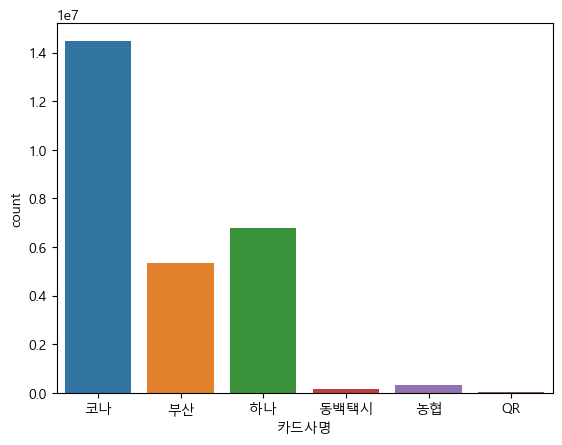

In [26]:
#2022년 4월부터 동백전 지역화폐로 은행 코나아이 실시. 2022년 4월 전까지는 하나은행 사용, 하나은행 사용전에는 부산은행 사용
sns.countplot(data=df, x="카드사명")
plt.show()

## 업종코드

In [25]:
df.업종코드.unique()

array([4010, 9130, 2102, 8001, 4020, 1123, 4021, 8310, 8320, 8021, 8399,
       2114, 8006, 2130, 8013, 2199, 8004, 2240, 3402, 6140, 8301, 8010,
       3305, 8005, 3306, 9305, 9204, 1020, 4499, 3309, 2121, 3307, 5191,
       2111, 5299, 4201, 9210, 3301, 2002, 9101, 5104, 3311, 7120, 5201,
       5101, 2112, 9301, 9398, 5010, 3001, 5199, 6130, 3308, 9901, 3102,
       3313, 9699, 5105, 2001, 8002, 8302, 4099, 2120, 4050, 4302, 7020,
       2113, 9602, 1003, 9006, 3202, 7041, 8499, 9121, 9001, 5001, 7050,
       5102, 2250, 4208, 7121, 3201, 2230, 4412, 5210, 7022, 9998, 7021,
       7112, 3302, 7010, 7103, 7099, 6120, 6102, 5030, 7015, 6110, 4401,
       6101, 1002, 7001, 4004, 4110, 7044, 9099, 3101, 7110, 9003, 7105,
       7102, 7014, 4205, 4399, 4421, 9004, 4080, 4430, 4111, 7101, 8401,
       8402, 9010, 7040, 5002, 6004, 2299, 4303, 7042, 7199, 2251, 3199,
       5202, 4411, 2010, 5040, 3399, 4299, 7111, 4301, 2020, 4410, 1110,
       5050, 1122, 2210, 8031, 5192, 2202, 9203, 42

## 업종명

In [27]:
df.업종명.unique()

array(['편 의 점', '사무서비스', '골프연습장', '일반한식', '슈퍼마켓', '택시', '연 쇄 점', '농축수산품',
       '미곡상', '스넥', '기타음료식품', '헬스클럽', '서양음식', '노 래 방', '주점', '기타레져업소',
       '일식회집', '애완동물', 'DP&E', '주차장', '제과점', '칵테일바', 'SK주유소', '중국식',
       'SK가스충전소', '학원', '사무통신기기수리', '기타숙박업', '기타잡화', '쌍용S-OIL', '당 구 장',
       'GS주유소', '독서실', '볼 링 장', '기타 사무용품', '정장(남성)', '세탁소', '주유소',
       '스포츠레져용품', '종합용역', '예체능계학원', 'GS 가스충전소', '사우나', '컴퓨터', '외국어학원',
       '테니스장', '레져업소', '기타4', '출판 및 인쇄물', '일반가구', '기타 교육기관', '세차장',
       '현대정유(오일뱅크)', '기계공구', '냉열기기', '쌍용S-OIL 가스충전소', '기타농업관련', '보습학원',
       '골프용품 전문점', '갈비전문점', '정육점', '기타유통업', '종합레져타운', '농축수산 가공품',
       '카페트.커튼.천막.지물', '의원', '수 영 장', '비료.사료.종자', '2급 호텔', '목재석재철물',
       '주방용식기', '약국', '기타건강식품', '화물운송', '보일러펌프샷시', '일반서적', '동물병원', '기능학원',
       '영화관', '스포츠 의류', '안마/스포츠마사지', '주방용구', '화원', '액세서리', '통신기기', '치과의원',
       '기타 전문점', '한의원', '의료용품', 'LPG 취급점', '병원(응급실 운영)', '피부미용실',
       '기타의료기관 및 기타의료기기', '카인테리어', '자동차부품', '문구용품', '치과병원', '자동차정비', '가방',
       '자

In [30]:
#pd.set_option('display.max_rows', None)
df['업종명'].value_counts()

#-> 업종 코드와 일치하는지 확인 후 삭제

편 의 점     4271463
서양음식      4047389
일반한식      3667224
슈퍼마켓      3266127
약국        1293606
           ...   
골동품점            5
혼수전문점           4
와이셔츠타이          3
기타2             2
성인용품점           1
Name: 업종명, Length: 210, dtype: int64

In [31]:
print(len(df['업종명'].unique()))
print(df.groupby('업종명')['업종코드'].nunique().sum())

#->업종코드 제거

210
210


## 출생연도

In [32]:
df.출생년도.unique()

array([1973, 1981, 1992, 1995, 1976, 1985, 1989, 1996, 1999, 1977, 1974,
       1972, 1990, 1994, 1998, 1964, 1970, 1983, 2001, 1997, 2000, 1980,
       1971, 1987, 1967, 1975, 1944, 1957, 1969, 1965, 1956, 1968, 1993,
       1991, 1979, 1963, 1982, 1961, 1988, 1978, 1966, 2003, 1962, 1986,
       2002, 1984, 2004, 1960, 1955, 1959, 2005, 2006, 1952, 1953, 1958,
       1947, 1951, 1949, 1954, 2007, 1948, 1942, 1946, 1933, 2008, 1950,
       1945, 1932, 1938, 1941, 1940, 1943, 1936, 1934, 1939, 1935, 1937,
       3688, 1929, 1931, 1925, 1930, 1928, 1923, 4607, 1921, 1924, 1927,
       1926], dtype=int64)

In [33]:
sorted_numbers = sorted(df.출생년도.unique(), reverse=True)
print(sorted_numbers)  
#4067,3688 -> 제거

[4607, 3688, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1921]


## 성별코드

In [34]:
df['성별코드'].value_counts()

F    14912119
M    12223041
Name: 성별코드, dtype: int64

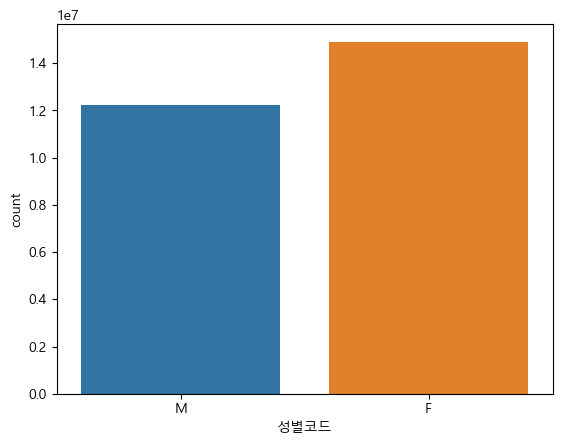

In [35]:
sns.countplot(data=df, x="성별코드")
plt.show()

## 거래건수

In [36]:
df.거래건수.unique()

array([ 1,  2,  3,  4,  5,  6, 10,  7,  8, 11, 30,  9, 12, 13, 24, 40, 20,
       15, 14, 21, 16, 17, 19, 18, 22, 28, 55, 23, 31, 26, 29, 37, 34, 27,
       56, 71, 57, 35, 36, 38, 41, 64, 25, 32, 63], dtype=int64)

In [37]:
df['거래건수'].value_counts()

1     24823825
2      1964625
3       264914
4        55319
5        15612
6         5727
7         2323
8         1119
9          569
10         350
11         227
12         136
13         114
14          64
15          47
16          32
17          28
18          18
20          17
19          15
22          11
24          10
21           8
40           6
23           5
30           5
26           4
31           4
28           4
29           3
32           2
27           2
41           2
38           2
36           1
25           1
64           1
34           1
35           1
57           1
71           1
56           1
37           1
55           1
63           1
Name: 거래건수, dtype: int64

# 변수 삭제/생성/변환

In [41]:
#데이터 전체가 부산광역시 이므로 제거
df=df.drop(['시도명'], axis=1)

In [42]:
#행정동명, 행정동 번호 모두 같아 둘 중 하나만 제거 하려 했으나 너무 많아 파악 어려워 구별로 보기로 함.
#행정동명, 행정동번호 모두 제거
df=df.drop(['행정동번호'], axis=1)
df=df.drop(['행정동명'], axis=1)

In [43]:
# 출생년도 이상값 제거 4607, 3688
df.drop(df[df['출생년도']==4607].index ,inplace=True, axis = 0)
df.drop(df[df['출생년도']==3688].index ,inplace=True, axis = 0)

In [44]:
#기준일자 type변환
df=df.astype({'기준일자' : str})

In [45]:
df['기준일자']=pd.to_datetime(df['기준일자'])

In [46]:
#요일변수 생성
df['요일']=df['기준일자'].dt.day_name()
df

,기준일자,기준시간대값,시군구명,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액,요일
0,2022-06-01,0,중구,코나,4010,편 의 점,1973,M,1,7350,Wednesday
1,2022-06-01,0,중구,부산,4010,편 의 점,1981,F,1,3700,Wednesday
2,2022-06-01,0,중구,부산,4010,편 의 점,1992,M,1,7500,Wednesday
3,2022-06-01,0,중구,부산,4010,편 의 점,1995,M,1,2700,Wednesday
4,2022-06-01,0,중구,코나,4010,편 의 점,1976,M,1,13900,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
27135155,2022-08-01,0,영도구,코나,4020,슈퍼마켓,1958,M,1,30000,Monday
27135156,2022-08-01,0,영도구,코나,8013,주점,1998,M,1,59600,Monday
27135157,2022-08-01,0,영도구,코나,8399,기타음료식품,1998,F,1,7500,Monday
27135158,2022-08-01,0,영도구,하나,4010,편 의 점,1971,F,2,7600,Monday


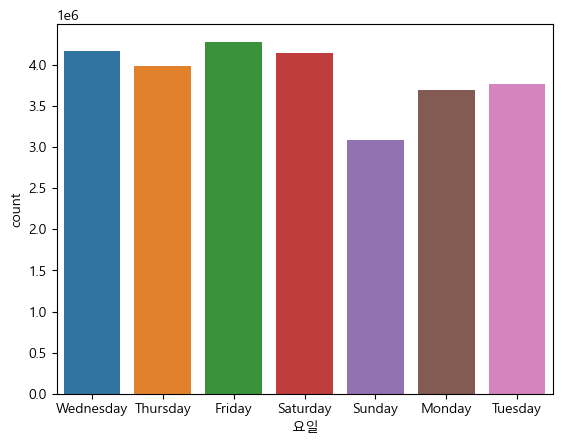

In [58]:
sns.countplot(data=df, x="요일")
plt.show()

In [49]:
#나이변수 생성
df['age']=2022-df['출생년도']+1

In [50]:
df['age'].unique()

array([ 50,  42,  31,  28,  47,  38,  34,  27,  24,  46,  49,  51,  33,
        29,  25,  59,  53,  40,  22,  26,  23,  43,  52,  36,  56,  48,
        79,  66,  54,  58,  67,  55,  30,  32,  44,  60,  41,  62,  35,
        45,  57,  20,  61,  37,  21,  39,  19,  63,  68,  64,  18,  17,
        71,  70,  65,  76,  72,  74,  69,  16,  75,  81,  77,  90,  15,
        73,  78,  91,  85,  82,  83,  80,  87,  89,  84,  88,  86,  94,
        92,  98,  93,  95, 100, 102,  99,  96,  97], dtype=int64)

In [53]:
#연령대 변수 생성
df['age_range'] = df['age']//10*10

In [54]:
df

,기준일자,기준시간대값,시군구명,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액,요일,age,age_range
0,2022-06-01,0,중구,코나,4010,편 의 점,1973,M,1,7350,Wednesday,50,50
1,2022-06-01,0,중구,부산,4010,편 의 점,1981,F,1,3700,Wednesday,42,40
2,2022-06-01,0,중구,부산,4010,편 의 점,1992,M,1,7500,Wednesday,31,30
3,2022-06-01,0,중구,부산,4010,편 의 점,1995,M,1,2700,Wednesday,28,20
4,2022-06-01,0,중구,코나,4010,편 의 점,1976,M,1,13900,Wednesday,47,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27135155,2022-08-01,0,영도구,코나,4020,슈퍼마켓,1958,M,1,30000,Monday,65,60
27135156,2022-08-01,0,영도구,코나,8013,주점,1998,M,1,59600,Monday,25,20
27135157,2022-08-01,0,영도구,코나,8399,기타음료식품,1998,F,1,7500,Monday,25,20
27135158,2022-08-01,0,영도구,하나,4010,편 의 점,1971,F,2,7600,Monday,52,50


In [56]:
#age_range 있으므로 출생년도, age제거
df=df.drop(['출생년도'], axis=1)
df=df.drop(['age'], axis=1)

In [61]:
#업종 중분류 데이터 이용하여 업종코드 일치하는 것 끼리 merge
code=pd.read_csv("업종코드_중분류.csv")
code

,중분류,업종코드
0,백화점/할인점,4001
1,백화점/할인점,4002
2,백화점/할인점,4004
3,백화점/할인점,4111
4,편의점/마켓,4010
...,...,...
326,편의점/마켓,8303
327,의류/패션잡화,4209
328,교육,5106
329,기타,5003


In [62]:
df=pd.merge(df,code, left_on='업종코드', right_on='업종코드', how='left')

In [63]:
df

,기준일자,기준시간대값,시군구명,카드사명,업종코드,업종명,성별코드,거래건수,총거래금액,요일,age_range,중분류
0,2022-06-01,0,중구,코나,4010,편 의 점,M,1,7350,Wednesday,50,편의점/마켓
1,2022-06-01,0,중구,부산,4010,편 의 점,F,1,3700,Wednesday,40,편의점/마켓
2,2022-06-01,0,중구,부산,4010,편 의 점,M,1,7500,Wednesday,30,편의점/마켓
3,2022-06-01,0,중구,부산,4010,편 의 점,M,1,2700,Wednesday,20,편의점/마켓
4,2022-06-01,0,중구,코나,4010,편 의 점,M,1,13900,Wednesday,40,편의점/마켓
...,...,...,...,...,...,...,...,...,...,...,...,...
27135014,2022-08-01,0,영도구,코나,4020,슈퍼마켓,M,1,30000,Monday,60,편의점/마켓
27135015,2022-08-01,0,영도구,코나,8013,주점,M,1,59600,Monday,20,기타
27135016,2022-08-01,0,영도구,코나,8399,기타음료식품,F,1,7500,Monday,20,생활
27135017,2022-08-01,0,영도구,하나,4010,편 의 점,F,2,7600,Monday,50,편의점/마켓


In [66]:
#업종 중분류 생성했으므로 업종명, 업종코드 제거
df=df.drop(['업종명'], axis=1)
df=df.drop(['업종코드'], axis=1)

In [67]:
#이 데이터는 한 고객당 1건이 아닌 해당 일자, 시간대와 일치하는 모든건수를 합한 결과로 나오므로 총 거래금액을 거래 건수로 나누어줌
df['건별거래금액'] = df['총거래금액']/df['거래건수']
len(df)

27135019

In [68]:
df

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액
0,2022-06-01,0,중구,코나,M,1,7350,Wednesday,50,편의점/마켓,7350.00
1,2022-06-01,0,중구,부산,F,1,3700,Wednesday,40,편의점/마켓,3700.00
2,2022-06-01,0,중구,부산,M,1,7500,Wednesday,30,편의점/마켓,7500.00
3,2022-06-01,0,중구,부산,M,1,2700,Wednesday,20,편의점/마켓,2700.00
4,2022-06-01,0,중구,코나,M,1,13900,Wednesday,40,편의점/마켓,13900.00
...,...,...,...,...,...,...,...,...,...,...,...
27135014,2022-08-01,0,영도구,코나,M,1,30000,Monday,60,편의점/마켓,30000.00
27135015,2022-08-01,0,영도구,코나,M,1,59600,Monday,20,기타,59600.00
27135016,2022-08-01,0,영도구,코나,F,1,7500,Monday,20,생활,7500.00
27135017,2022-08-01,0,영도구,하나,F,2,7600,Monday,50,편의점/마켓,3800.00


In [69]:
#건별 거래금액이 10원 이하인 것은 있을 수 없는 거래라고 생각하여 111건 제거
len(df[df['건별거래금액'] < 10])

111

In [70]:
df.drop(df[(df['건별거래금액'] < 10)].index, inplace=True)
len(df)

27134908

In [76]:
# '기준일자' 열에서 월을 추출하여 새로운 열 '월' 추가
df['월'] = df['기준일자'].dt.month
df

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
0,2022-06-01,0,중구,코나,M,1,7350,Wednesday,50,편의점/마켓,7350.00,6
1,2022-06-01,0,중구,부산,F,1,3700,Wednesday,40,편의점/마켓,3700.00,6
2,2022-06-01,0,중구,부산,M,1,7500,Wednesday,30,편의점/마켓,7500.00,6
3,2022-06-01,0,중구,부산,M,1,2700,Wednesday,20,편의점/마켓,2700.00,6
4,2022-06-01,0,중구,코나,M,1,13900,Wednesday,40,편의점/마켓,13900.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27135014,2022-08-01,0,영도구,코나,M,1,30000,Monday,60,편의점/마켓,30000.00,8
27135015,2022-08-01,0,영도구,코나,M,1,59600,Monday,20,기타,59600.00,8
27135016,2022-08-01,0,영도구,코나,F,1,7500,Monday,20,생활,7500.00,8
27135017,2022-08-01,0,영도구,하나,F,2,7600,Monday,50,편의점/마켓,3800.00,8


In [78]:
#변수 type변환
df=df.astype({'기준시간대값' : str, 'age_range' : str,'월' : str})

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27134908 entries, 0 to 27135018
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   기준일자       datetime64[ns]
 1   기준시간대값     object        
 2   시군구명       object        
 3   카드사명       object        
 4   성별코드       object        
 5   거래건수       int64         
 6   총거래금액      int64         
 7   요일         object        
 8   age_range  object        
 9   중분류        object        
 10  건별거래금액     float64       
 11  월          object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 2.6+ GB


In [3]:
#월별 요일별 거래 건수
df_grouped = df.groupby(['월', '요일'])['거래건수'].agg(**{'월별요일별거래건수':'sum'})
df_grouped

월별요일별거래건수
월 요일                  
6 Friday       1689303
  Monday       1426659
  Saturday     1692614
  Sunday       1208701
  Thursday     1888161
  Tuesday      1440922
  Wednesday    1878287
7 Friday       1881674
  Monday       1346246
  Saturday     1862979
  Sunday       1390600
  Thursday     1408824
  Tuesday      1446426
  Wednesday    1435463
8 Friday       1166188
  Monday       1286095
  Saturday     1043507
  Sunday        799936
  Thursday     1098757
  Tuesday      1255464
  Wednesday    1279824

In [4]:
#월별요일별거래총액
spend_of_month_and_day = df.groupby(['월', '요일'])['총거래금액'].agg(**{'월별요일별거래총액':'sum'})
spend_of_month_and_day

월별요일별거래총액
월 요일                    
6 Friday     36325409025
  Monday     27434760547
  Saturday   37348948752
  Sunday     23623771785
  Thursday   39255872042
  Tuesday    29239746542
  Wednesday  38387045550
7 Friday     41987617851
  Monday     28830269593
  Saturday   42689788089
  Sunday     28066964390
  Thursday   28778815289
  Tuesday    30280999255
  Wednesday  29399374410
8 Friday     21577459516
  Monday     23395943842
  Saturday   20326098116
  Sunday     14025666804
  Thursday   20011454374
  Tuesday    22768206999
  Wednesday  23304801932

In [101]:
#메모리 에러로 한번 저장했다가 다시 불러옴
#df.to_csv("df1.csv", index = False)

In [2]:
# 데이터 불러오기
#df= pd.read_csv("df1.csv")
#df.head()

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
0,2022-06-01,0,중구,코나,M,1,7350,Wednesday,50,편의점/마켓,7350.0,6
1,2022-06-01,0,중구,부산,F,1,3700,Wednesday,40,편의점/마켓,3700.0,6
2,2022-06-01,0,중구,부산,M,1,7500,Wednesday,30,편의점/마켓,7500.0,6
3,2022-06-01,0,중구,부산,M,1,2700,Wednesday,20,편의점/마켓,2700.0,6
4,2022-06-01,0,중구,코나,M,1,13900,Wednesday,40,편의점/마켓,13900.0,6


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 요일 순서 지정
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['요일'] = pd.Categorical(df['요일'], categories=weekday_order, ordered=True)

# 기준일자 열을 datetime 자료형으로 변환
df['기준일자'] = pd.to_datetime(df['기준일자'])

# 월별 요일별 거래건수 집계
df_grouped = df.groupby(['월', '요일'])['거래건수'].sum().reset_index()

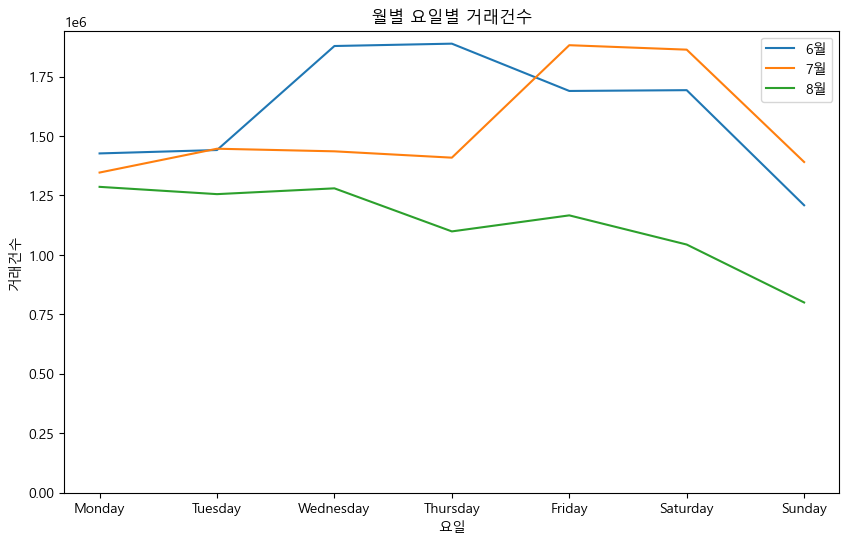

In [6]:
# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(df_grouped['월'].unique()):
    data = df_grouped[df_grouped['월'] == month]
    ax.plot(data['요일'], data['거래건수'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('거래건수')
ax.set_title('월별 요일별 거래건수')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

#->그래도 일요일이 꽤 낮은편.

In [15]:
#요일 별 거래 건수 보기 위해 주 개수로 나눠줌

df_grouped = df.groupby(['월', '요일'])['거래건수'].sum().reset_index()
df_grouped['월별요일별거래건수'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['거래건수']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

df_grouped['월별요일별거래건수'] = df_grouped.apply(custom_division, axis=1)
df_grouped

,월,요일,거래건수,월별요일별거래건수
0,6,Monday,1426659,356664
1,6,Tuesday,1440922,360230
2,6,Wednesday,1878287,375657
3,6,Thursday,1888161,377632
4,6,Friday,1689303,422325
5,6,Saturday,1692614,423153
6,6,Sunday,1208701,302175
7,7,Monday,1346246,336561
8,7,Tuesday,1446426,361606
9,7,Wednesday,1435463,358865


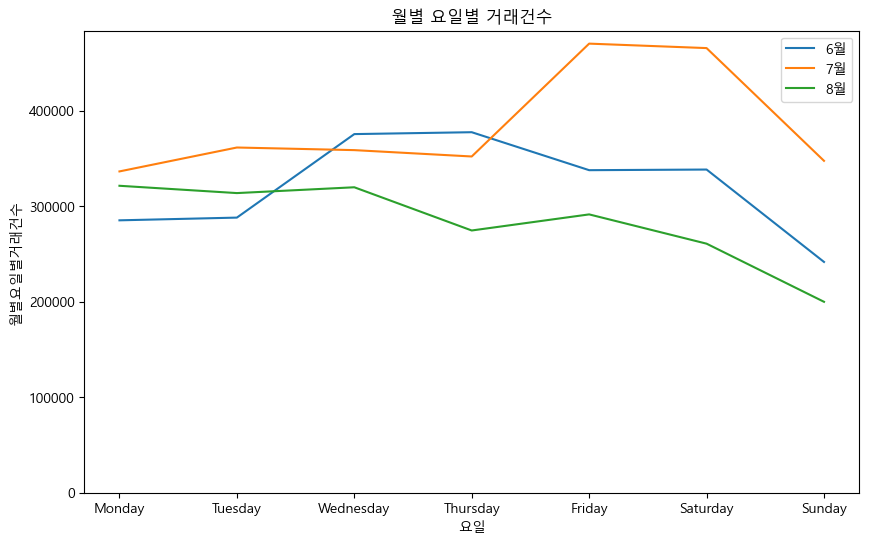

In [14]:
# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(df_grouped['월'].unique()):
    data = df_grouped[df_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별거래건수'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별거래건수')
ax.set_title('월별 요일별 거래건수')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

#->그래도 일요일이 꽤 낮은편.

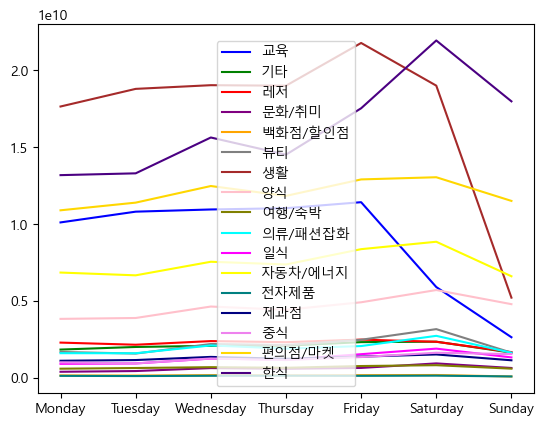

In [16]:
#전체 데이터 건별 거래금액 합계 -> 생활, 한식,편의점/마켓,교육 순.
#생활, 교육은 일요일에 많이 떨어지는 경향이 있음. 반면 한식은 토요일에 가장 많고, 그다음 일요일이 많다
#생활, 교육분야는 주말에 많이 사용하지 않는다. 특히 일요일에는 문 안여는 가맹점도 있을 것이라 생각.
#한식은 주말에 많이 나가서 사먹을 것이기 때문에 높을 것이라 생각
#편의점/마켓은 24시 평일/주말 상관없이 비슷하다.

# 그룹화해서 건별거래금액의 합계 계산
grouped = df.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()


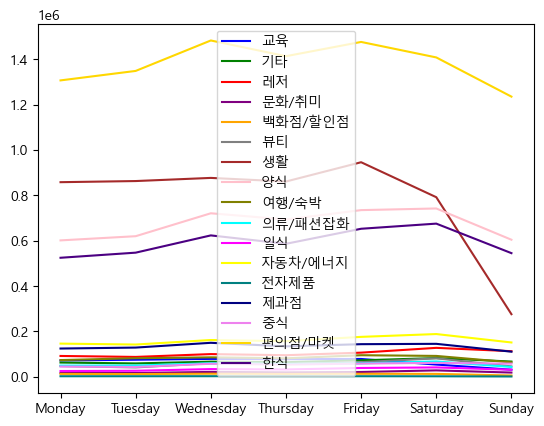

In [20]:
#전체 데이터 거래건수 합계 -> 편의점/마켓, 생활,양식,한식 4개가 가장 많다.
#그 중 편의점이 가장 많은데 24시간 운영하므로 가장많이 이용된 것이라 생각
#데이터의 연령대가 30-50대가 많은데 그 중 여성의 비율이 높아 생활 데이터의 거래 건수가 많을 것이라 생각


# 그룹화해서 거래건수의 합계 계산
grouped = df.groupby(['중분류', '요일'])['거래건수'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['거래건수'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 추가 데이터

In [75]:
#부산시 인구수 데이터
population = pd.read_csv("부산시 인구.csv",encoding = 'cp949',low_memory =False)
population

,시군구명,0,10,20,30,40,50,60,70,80,90,100
0,중구,1081,1899,6581,5169,5374,6808,7982,5064,2281,333,10
1,서구,5193,7192,13333,11015,14470,17211,19388,12413,5943,738,16
2,동구,3960,4852,10425,11165,11970,14490,16358,10885,5226,623,23
3,영도구,4709,6971,11433,10687,14627,18430,22316,14763,6540,729,19
4,부산진구,19239,23941,51347,47425,49874,56204,57667,32242,14464,1617,34
5,동래구,19879,25377,31250,33354,44334,44232,42898,23768,9501,1195,32
6,남구,15708,22644,36935,28139,40082,42080,41491,25564,10680,1252,37
7,북구,17593,22075,34915,33871,39353,51479,49588,22980,9382,1143,33
8,해운대구,25965,36471,45666,44875,63552,69560,60871,32126,14410,1893,58
9,사하구,17669,24324,37826,36085,45076,53154,54335,27880,10977,1406,22


In [80]:
#기존 인구수 데이터
population = pd.read_csv("busan_population.csv",encoding = 'cp949',low_memory =False)
population

,region,june,july,august
0,중구,42692,42594,42455
1,서구,106397,106818,107522
2,동구,90186,89944,89800
3,영도구,111307,111271,111100
4,부산진구,353674,354120,354367
5,동래구,275668,275956,275830
6,남구,265158,264557,264112
7,북구,282625,282381,282230
8,해운대구,396120,395601,394626
9,사하구,309199,308777,308286


In [81]:
#6,7,8월 인구 수 평균 내서 올림
population['average'] = population[['june', 'july', 'august']].mean(axis=1)
population['average_round'] = np.ceil(population['average']).astype(int)
population

,region,june,july,august,average,average_round
0,중구,42692,42594,42455,42580.33,42581
1,서구,106397,106818,107522,106912.33,106913
2,동구,90186,89944,89800,89976.67,89977
3,영도구,111307,111271,111100,111226.00,111226
4,부산진구,353674,354120,354367,354053.67,354054
5,동래구,275668,275956,275830,275818.00,275818
6,남구,265158,264557,264112,264609.00,264609
7,북구,282625,282381,282230,282412.00,282412
8,해운대구,396120,395601,394626,395449.00,395449
9,사하구,309199,308777,308286,308754.00,308754


In [83]:
#부산시 지역화폐 가맹점 데이터
store = pd.read_csv("가맹점.csv",encoding = 'cp949',low_memory =False)
store.head()

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자
0,1,고봉민김밥인,부산 영도구 와치로 250 (동삼동) 1층,NaN,35.08,129.07,2022-12-22
1,2,미사랑스킨앤바디,"부산 사하구 승학로224번길 10 ,1층(괴정동)",NaN,35.10,128.99,2022-12-22
2,3,피자스쿨 부산재송점,부산 해운대구 재반로 182 비둘기맨션상가 B동 가호 (재송동),NaN,35.19,129.13,2022-12-22
3,4,미스터피자아시아드2호점,"부산 연제구 월드컵대로 232 2층 (거제동,거벌빌등)",NaN,35.19,129.07,2022-12-22
4,5,성원칼국수,부산 부산진구 냉정로 220-1 (개금동),NaN,35.15,129.02,2022-12-22


In [84]:
store.loc[store['도로명'].isna(), '도로명'] = store.loc[store['도로명'].isna(), '지번']
store

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자
0,1,고봉민김밥인,부산 영도구 와치로 250 (동삼동) 1층,NaN,35.08,129.07,2022-12-22
1,2,미사랑스킨앤바디,"부산 사하구 승학로224번길 10 ,1층(괴정동)",NaN,35.10,128.99,2022-12-22
2,3,피자스쿨 부산재송점,부산 해운대구 재반로 182 비둘기맨션상가 B동 가호 (재송동),NaN,35.19,129.13,2022-12-22
3,4,미스터피자아시아드2호점,"부산 연제구 월드컵대로 232 2층 (거제동,거벌빌등)",NaN,35.19,129.07,2022-12-22
4,5,성원칼국수,부산 부산진구 냉정로 220-1 (개금동),NaN,35.15,129.02,2022-12-22
...,...,...,...,...,...,...,...
126936,126937,행복한 정쌤 공부방,"부산 강서구 명지오션시티11로 22, 102동 203호 (명지동,명지두산위브포세이돈)",NaN,35.08,128.90,2022-12-22
126937,126938,행복홈케어,"부산 사하구 서포로30번길 12 207동 301호 (구평동,e편한세상아파트)",NaN,35.08,128.99,2022-12-22
126938,126939,현대표구사,부산 중구 중앙대로 137-1 (대창동2가),NaN,35.11,129.04,2022-12-22
126939,126940,현혜반점,"부산 사상구 덕포동 404-7,8","부산 사상구 덕포동 404-7,8",NaN,NaN,2022-12-22


In [85]:
#부산시에 해당하지 않는 가맹점이 있어 제거
store1 = store[store['도로명'].str.startswith('부산')]
store1

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자
0,1,고봉민김밥인,부산 영도구 와치로 250 (동삼동) 1층,NaN,35.08,129.07,2022-12-22
1,2,미사랑스킨앤바디,"부산 사하구 승학로224번길 10 ,1층(괴정동)",NaN,35.10,128.99,2022-12-22
2,3,피자스쿨 부산재송점,부산 해운대구 재반로 182 비둘기맨션상가 B동 가호 (재송동),NaN,35.19,129.13,2022-12-22
3,4,미스터피자아시아드2호점,"부산 연제구 월드컵대로 232 2층 (거제동,거벌빌등)",NaN,35.19,129.07,2022-12-22
4,5,성원칼국수,부산 부산진구 냉정로 220-1 (개금동),NaN,35.15,129.02,2022-12-22
...,...,...,...,...,...,...,...
126936,126937,행복한 정쌤 공부방,"부산 강서구 명지오션시티11로 22, 102동 203호 (명지동,명지두산위브포세이돈)",NaN,35.08,128.90,2022-12-22
126937,126938,행복홈케어,"부산 사하구 서포로30번길 12 207동 301호 (구평동,e편한세상아파트)",NaN,35.08,128.99,2022-12-22
126938,126939,현대표구사,부산 중구 중앙대로 137-1 (대창동2가),NaN,35.11,129.04,2022-12-22
126939,126940,현혜반점,"부산 사상구 덕포동 404-7,8","부산 사상구 덕포동 404-7,8",NaN,NaN,2022-12-22


In [86]:
store1['도로명'] = store1['도로명'].astype(str)
def get_store1(x):
    tokens = x.split()
    if len(tokens) >= 2:
        return tokens[1]
    else:
        return None

store1['시군구명'] = store1['도로명'].apply(get_store1)

C:\Users\samsung\AppData\Local\Temp\ipykernel_2404\809157204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1['도로명'] = store1['도로명'].astype(str)
C:\Users\samsung\AppData\Local\Temp\ipykernel_2404\809157204.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1['시군구명'] = store1['도로명'].apply(get_store1)


In [87]:
store1

,순번,가맹점명,도로명,지번,위도,경도,데이터기준일자,시군구명
0,1,고봉민김밥인,부산 영도구 와치로 250 (동삼동) 1층,NaN,35.08,129.07,2022-12-22,영도구
1,2,미사랑스킨앤바디,"부산 사하구 승학로224번길 10 ,1층(괴정동)",NaN,35.10,128.99,2022-12-22,사하구
2,3,피자스쿨 부산재송점,부산 해운대구 재반로 182 비둘기맨션상가 B동 가호 (재송동),NaN,35.19,129.13,2022-12-22,해운대구
3,4,미스터피자아시아드2호점,"부산 연제구 월드컵대로 232 2층 (거제동,거벌빌등)",NaN,35.19,129.07,2022-12-22,연제구
4,5,성원칼국수,부산 부산진구 냉정로 220-1 (개금동),NaN,35.15,129.02,2022-12-22,부산진구
...,...,...,...,...,...,...,...,...
126936,126937,행복한 정쌤 공부방,"부산 강서구 명지오션시티11로 22, 102동 203호 (명지동,명지두산위브포세이돈)",NaN,35.08,128.90,2022-12-22,강서구
126937,126938,행복홈케어,"부산 사하구 서포로30번길 12 207동 301호 (구평동,e편한세상아파트)",NaN,35.08,128.99,2022-12-22,사하구
126938,126939,현대표구사,부산 중구 중앙대로 137-1 (대창동2가),NaN,35.11,129.04,2022-12-22,중구
126939,126940,현혜반점,"부산 사상구 덕포동 404-7,8","부산 사상구 덕포동 404-7,8",NaN,NaN,2022-12-22,사상구


In [89]:
#구 별 가맹점 개수
store_count = store1['시군구명'].value_counts()
store_count

부산진구    16031
해운대구    13122
동래구     10508
사하구      9564
금정구      8710
남구       8243
북구       8068
사상구      7999
수영구      7912
연제구      7538
기장군      6763
강서구      5772
중구       5132
동구       4991
서구       3333
영도구      3218
Name: 시군구명, dtype: int64

In [90]:
# 데이터 합치기 위해 열 이름 달아주는 코드
series = store1['시군구명']
# '시군구명' 별 개수를 계산하여 'count' 열을 가진 새로운 데이터프레임 생성
store2 = pd.DataFrame({'count': series.value_counts()})
# 인덱스를 새로운 열로 추가하여 DataFrame 생성
store2 = store2.reset_index()
# 열 이름 변경
store2.columns = ['시군구명', 'count']
print(store2)

    시군구명  count
0   부산진구  16031
1   해운대구  13122
2    동래구  10508
3    사하구   9564
4    금정구   8710
5     남구   8243
6     북구   8068
7    사상구   7999
8    수영구   7912
9    연제구   7538
10   기장군   6763
11   강서구   5772
12    중구   5132
13    동구   4991
14    서구   3333
15   영도구   3218


In [91]:
#구 별 인구 수 데이터와 가맹점 데이터 생성
total_count = pd.merge(population[['region', 'average_round']], store2[['시군구명', 'count']], left_on='region', right_on='시군구명')
total_count = total_count[['시군구명', 'average_round', 'count']]
total_count

,시군구명,average_round,count
0,중구,42581,5132
1,서구,106913,3333
2,동구,89977,4991
3,영도구,111226,3218
4,부산진구,354054,16031
5,동래구,275818,10508
6,남구,264609,8243
7,북구,282412,8068
8,해운대구,395449,13122
9,사하구,308754,9564


In [92]:
#인구 수 대비 가맹점 개수 비율
total_count['ratio'] = total_count['count'] / total_count['average_round']
total_count

,시군구명,average_round,count,ratio
0,중구,42581,5132,0.12
1,서구,106913,3333,0.03
2,동구,89977,4991,0.06
3,영도구,111226,3218,0.03
4,부산진구,354054,16031,0.05
5,동래구,275818,10508,0.04
6,남구,264609,8243,0.03
7,북구,282412,8068,0.03
8,해운대구,395449,13122,0.03
9,사하구,308754,9564,0.03


In [93]:
df['시군구명'].value_counts()

부산진구    3568478
해운대구    3075184
동래구     2504945
금정구     2151431
사하구     2004880
북구      1995619
연제구     1912035
남구      1881507
수영구     1595574
사상구     1489430
강서구     1336111
기장군      963681
동구       726391
서구       691523
중구       655690
영도구      582429
Name: 시군구명, dtype: int64

# 구 별 EDA

전반적으로 동백전 사용량 여성이 많고, 코나,하나,부산 은행 순으로 사용한다.  
보통 30-40대가 가장 많이 사용하는 경향이 있다.   
점심, 저녁 시간대인 12시, 18시 가 가장 많이 사용되었다.  
반면 총 거래금액은 20시가 가장 높다.. ->왜?  
  
특이사항 -> 금정구 40-50대보다 20대의 사용량이 가장 많은 구  
강서구 30-40대가 압도적으로 많고, 다른 구에 비해 50-60대가 적다  
기장군 - 주말에 거래금액 많이 변동

## 부산진구  
평균 인구 2번째로 많고, 가맹점 수 제일 많으며, 거래금액 제일 많은 구.  가맹점 수가 많아서 거래 금액도 제일 높은 것 같다.

In [22]:
jin = df[df['시군구명']=='부산진구']
jin

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
131,2022-06-01,0,부산진구,코나,F,1,33100,Wednesday,20,레저,33100.0,6
132,2022-06-01,0,부산진구,코나,F,1,25000,Wednesday,20,문화/취미,25000.0,6
133,2022-06-01,0,부산진구,코나,F,1,4000,Wednesday,20,문화/취미,4000.0,6
134,2022-06-01,0,부산진구,코나,F,1,4500,Wednesday,50,편의점/마켓,4500.0,6
135,2022-06-01,0,부산진구,코나,M,1,4800,Wednesday,50,편의점/마켓,4800.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27132727,2022-08-31,23,부산진구,코나,F,1,8700,Wednesday,30,여행/숙박,8700.0,8
27132728,2022-08-31,23,부산진구,코나,M,1,9000,Wednesday,20,편의점/마켓,9000.0,8
27132729,2022-08-31,23,부산진구,코나,M,1,1500,Wednesday,20,양식,1500.0,8
27132730,2022-08-31,23,부산진구,하나,M,1,3800,Wednesday,30,편의점/마켓,3800.0,8


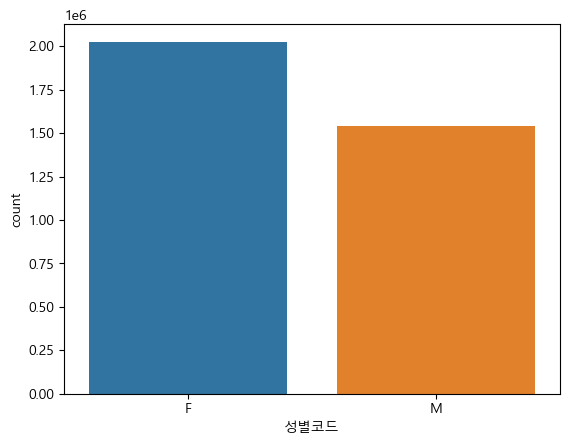

In [23]:
jin['성별코드'].value_counts()
sns.countplot(data=jin, x="성별코드")
plt.show()

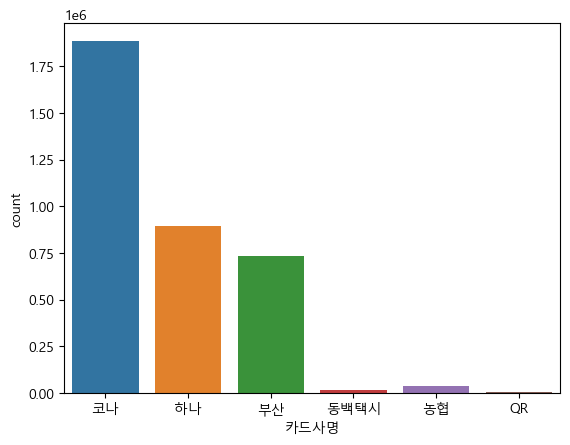

In [24]:
sns.countplot(data=jin, x="카드사명")
plt.show()

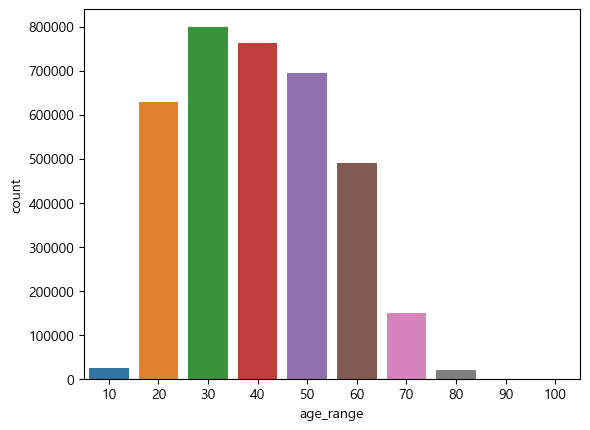

In [25]:
sns.countplot(data=jin, x="age_range")
plt.show()

In [30]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
jin_grouped = jin.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
jin_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

jin_grouped['월별요일별건별거래금액'] = jin_grouped.apply(custom_division, axis=1)
jin_grouped

,월,요일,건별거래금액,월별요일별건별거래금액
0,6,Monday,3246303751.20,811575937.00
1,6,Tuesday,3534630878.91,883657719.00
2,6,Wednesday,4631115748.04,926223149.00
3,6,Thursday,4752704351.74,950540870.00
4,6,Friday,4390218718.04,1097554679.00
5,6,Saturday,4505861601.23,1126465400.00
6,6,Sunday,2586294709.15,646573677.00
7,7,Monday,3487090845.31,871772711.00
8,7,Tuesday,3647860100.42,911965025.00
9,7,Wednesday,3530064396.31,882516099.00


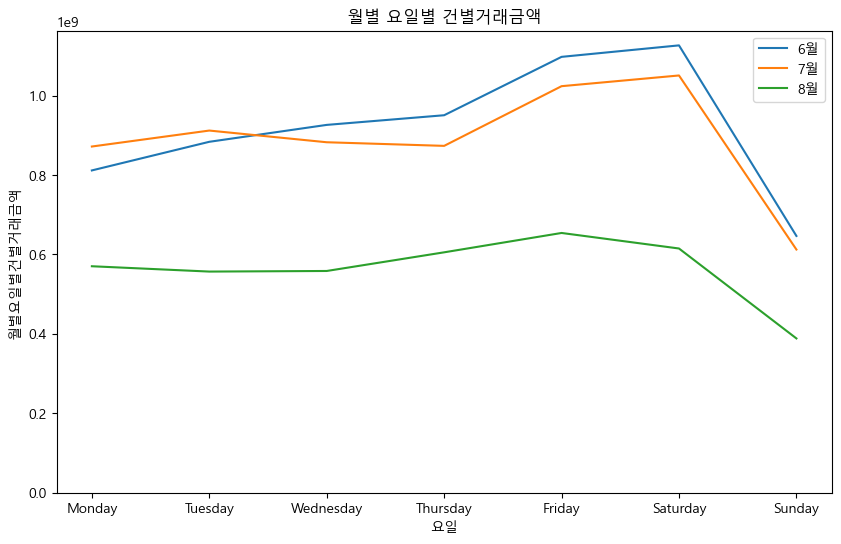

In [32]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(jin_grouped['월'].unique()):
    data = jin_grouped[jin_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

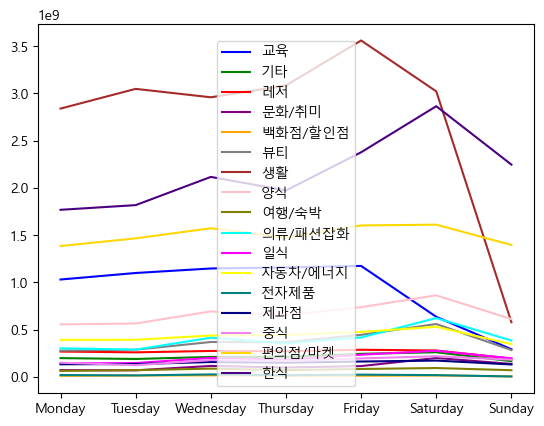

In [33]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = jin.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

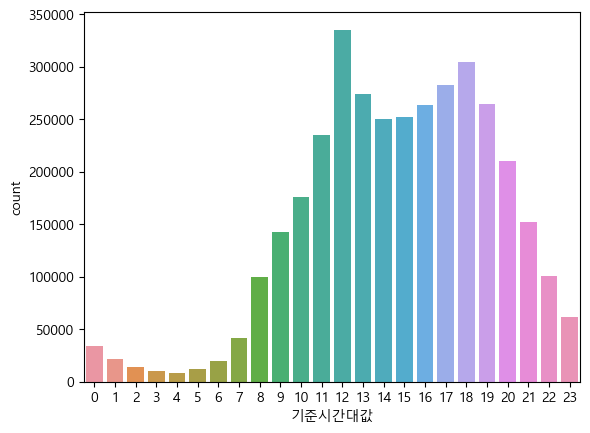

In [34]:
sns.countplot(data=jin, x="기준시간대값")
plt.show()

기준시간대값
0      37549
1      23647
2      15697
3      10576
4       8811
5      12144
6      20514
7      43329
8     110586
9     155808
10    191877
11    258716
12    387401
13    314820
14    282226
15    283117
16    294421
17    315191
18    344957
19    301356
20    238744
21    170806
22    112627
23     67767
Name: 거래건수, dtype: int64

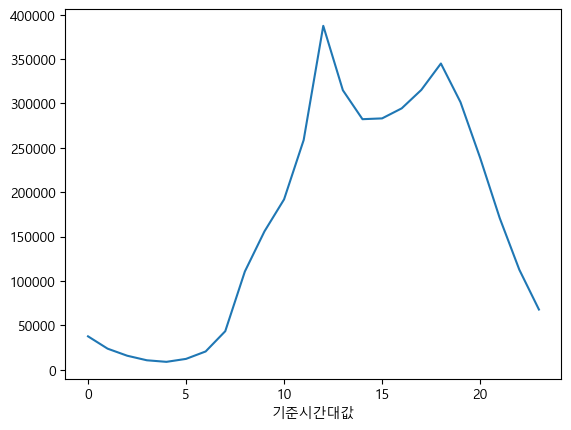

In [35]:
#시간대별 총 거래금액 평균 확인
jin.groupby(['기준시간대값'])['거래건수'].sum().plot()
jin.groupby(['기준시간대값'])['거래건수'].sum()

## 해운대구
인구수 가장 많고, 가맹점 수 두번째로 많은 구.  
40-50대가 가장 많이 사용한다.  
생활, 교육, 한식, 편의점/마켓 순으로 많다.  생활,교육은 일요일에 떨어지는 경향이 있으나 한식은 토,일이 제일 많다.  

In [36]:
hae = df[df['시군구명']=='해운대구']
hae

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
999,2022-06-01,0,해운대구,부산,M,1,8000,Wednesday,40,편의점/마켓,8000.00,6
1000,2022-06-01,0,해운대구,부산,M,1,3800,Wednesday,20,편의점/마켓,3800.00,6
1001,2022-06-01,0,해운대구,부산,M,1,20500,Wednesday,20,편의점/마켓,20500.00,6
1002,2022-06-01,0,해운대구,부산,M,1,4500,Wednesday,20,편의점/마켓,4500.00,6
1003,2022-06-01,0,해운대구,부산,F,1,13400,Wednesday,20,편의점/마켓,13400.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27133476,2022-08-31,23,해운대구,코나,F,1,14950,Wednesday,60,편의점/마켓,14950.00,8
27133477,2022-08-31,23,해운대구,코나,M,1,38000,Wednesday,20,한식,38000.00,8
27133478,2022-08-31,23,해운대구,코나,M,1,47000,Wednesday,30,기타,47000.00,8
27133479,2022-08-31,23,해운대구,하나,M,1,9400,Wednesday,50,여행/숙박,9400.00,8


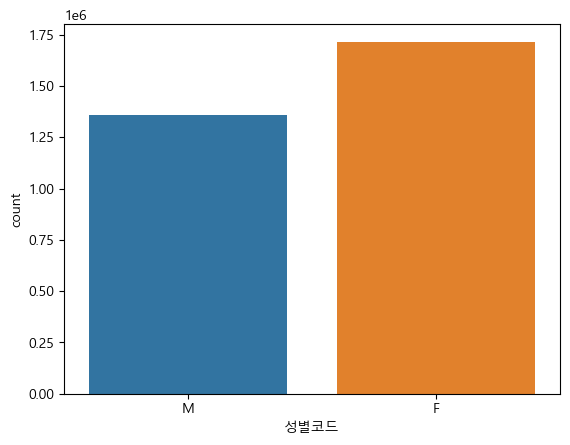

In [37]:
hae['성별코드'].value_counts()
sns.countplot(data=hae, x="성별코드")
plt.show()

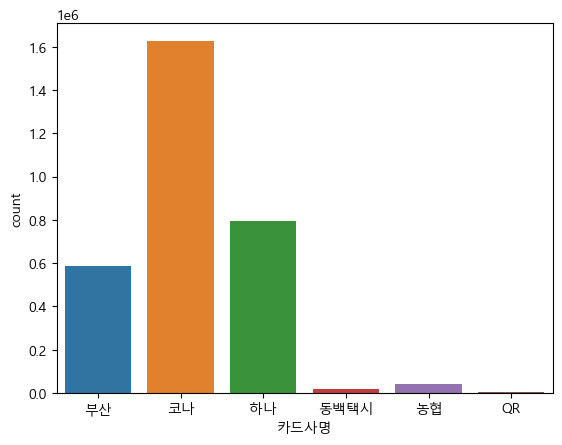

In [38]:
sns.countplot(data=hae, x="카드사명")
plt.show()

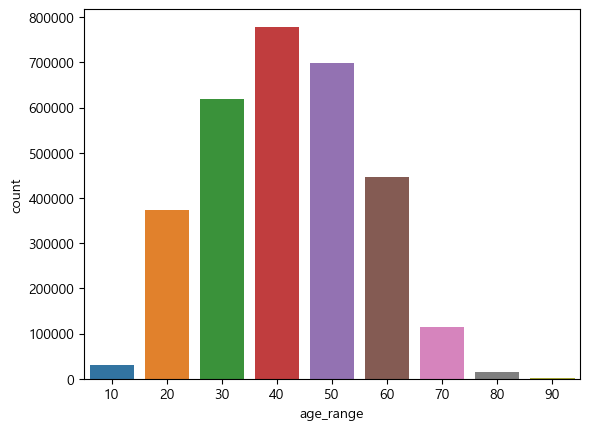

In [39]:
sns.countplot(data=hae, x="age_range")
plt.show()

In [40]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
hae_grouped = hae.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
hae_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

hae_grouped['월별요일별건별거래금액'] = hae_grouped.apply(custom_division, axis=1)

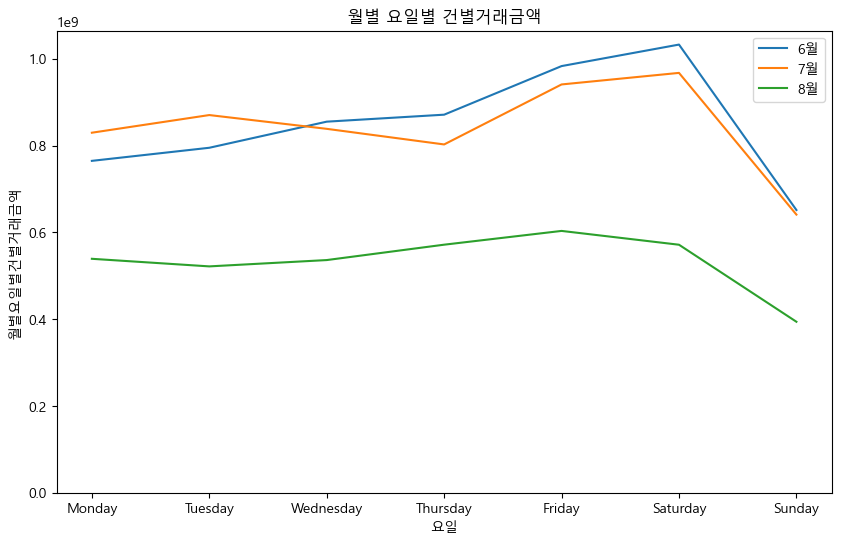

In [41]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(hae_grouped['월'].unique()):
    data = hae_grouped[hae_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

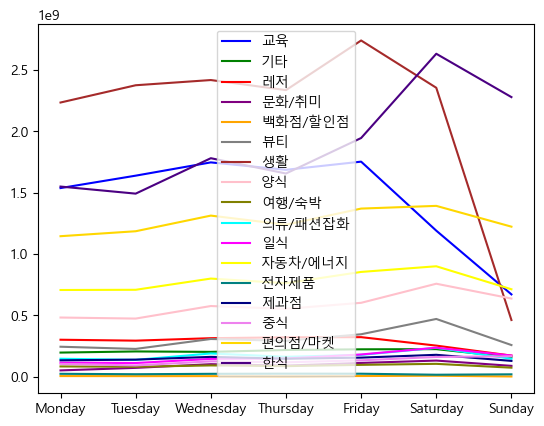

In [42]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = hae.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 사하구

In [43]:
saha = df[df['시군구명']=='사하구']
saha

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
1353,2022-06-01,0,사하구,동백택시,M,1,14120,Wednesday,40,여행/숙박,14120.00,6
1354,2022-06-01,0,사하구,동백택시,F,1,4560,Wednesday,30,여행/숙박,4560.00,6
1355,2022-06-01,0,사하구,부산,F,1,2600,Wednesday,60,편의점/마켓,2600.00,6
1356,2022-06-01,0,사하구,부산,M,2,58600,Wednesday,50,편의점/마켓,29300.00,6
1357,2022-06-01,0,사하구,코나,M,1,6120,Wednesday,50,여행/숙박,6120.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27133619,2022-08-31,23,사하구,코나,F,1,4050,Wednesday,20,편의점/마켓,4050.00,8
27133620,2022-08-31,23,사하구,코나,M,1,44900,Wednesday,40,편의점/마켓,44900.00,8
27133621,2022-08-31,23,사하구,하나,M,2,6400,Wednesday,50,편의점/마켓,3200.00,8
27133622,2022-08-31,23,사하구,하나,M,1,25800,Wednesday,30,편의점/마켓,25800.00,8


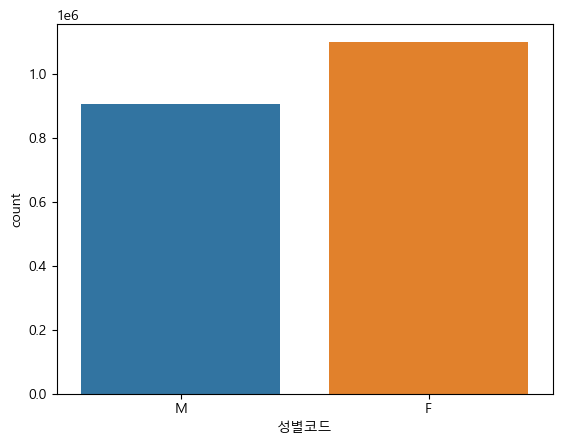

In [44]:
saha['성별코드'].value_counts()
sns.countplot(data=saha, x="성별코드")
plt.show()

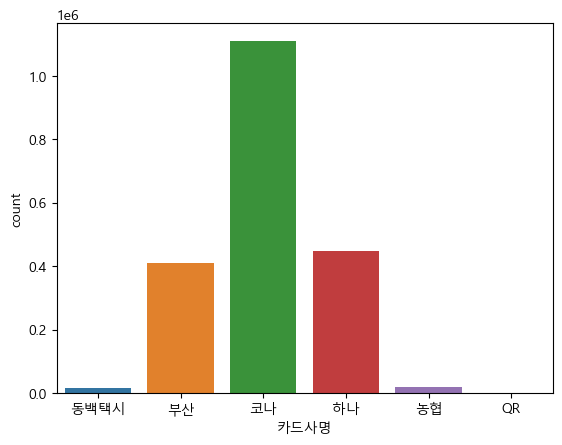

In [45]:
sns.countplot(data=saha, x="카드사명")
plt.show()

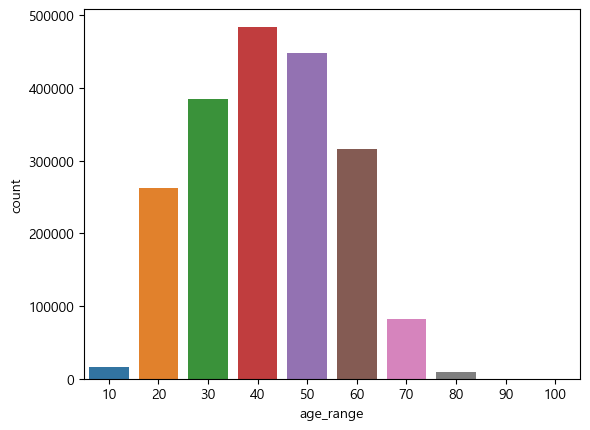

In [46]:
sns.countplot(data=saha, x="age_range")
plt.show()

In [47]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
saha_grouped = saha.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
saha_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

saha_grouped['월별요일별건별거래금액'] = saha_grouped.apply(custom_division, axis=1)

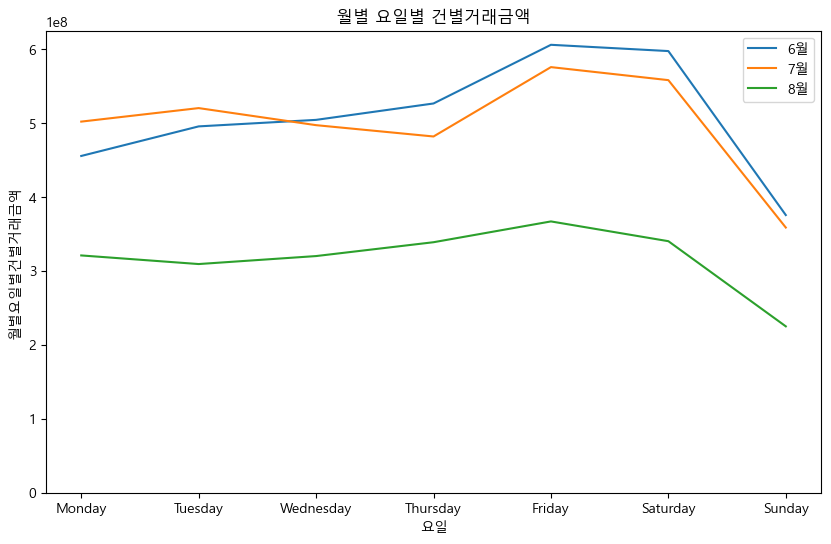

In [48]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(saha_grouped['월'].unique()):
    data = saha_grouped[saha_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

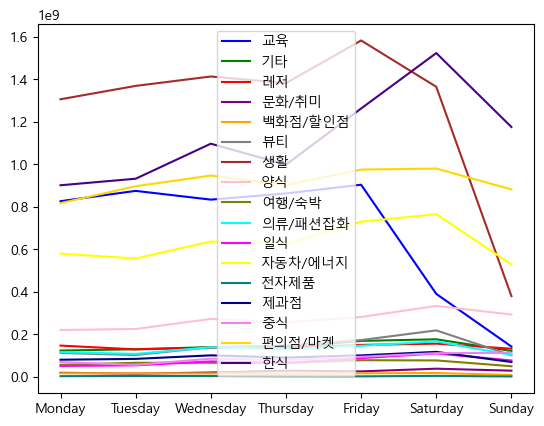

In [49]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = saha.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 북구

In [50]:
buk = df[df['시군구명']=='북구']
buk

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
766,2022-06-01,0,북구,부산,F,1,10450,Wednesday,20,편의점/마켓,10450.00,6
767,2022-06-01,0,북구,코나,M,1,4500,Wednesday,30,편의점/마켓,4500.00,6
768,2022-06-01,0,북구,코나,M,1,1100,Wednesday,20,편의점/마켓,1100.00,6
769,2022-06-01,0,북구,코나,M,1,42500,Wednesday,30,한식,42500.00,6
770,2022-06-01,0,북구,코나,M,1,54500,Wednesday,30,일식,54500.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27134849,2022-08-31,14,북구,코나,M,1,5000,Wednesday,40,생활,5000.00,8
27134850,2022-08-31,14,북구,코나,F,1,20000,Wednesday,30,생활,20000.00,8
27134851,2022-08-31,14,북구,코나,F,1,54000,Wednesday,30,생활,54000.00,8
27134852,2022-08-31,14,북구,코나,F,1,9500,Wednesday,20,생활,9500.00,8


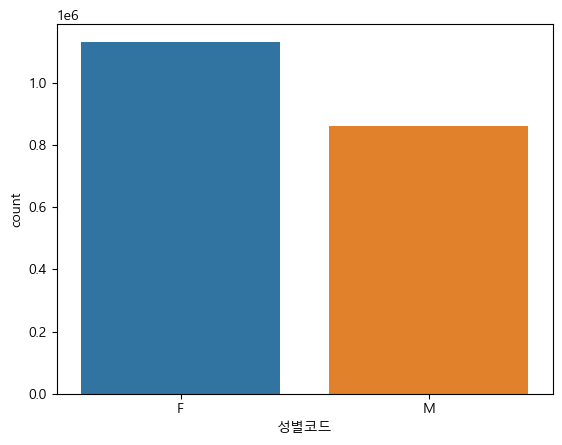

In [51]:
buk['성별코드'].value_counts()
sns.countplot(data=buk, x="성별코드")
plt.show()

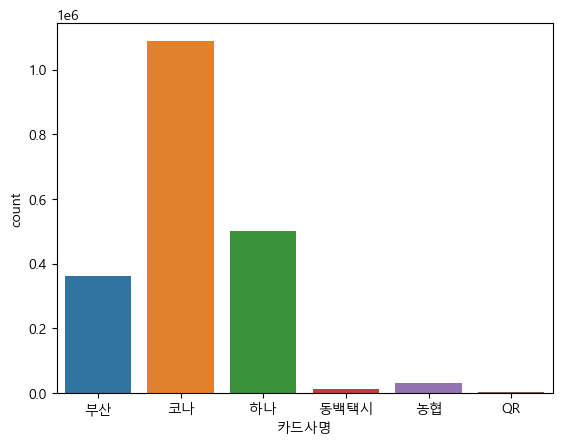

In [52]:
sns.countplot(data=buk, x="카드사명")
plt.show()

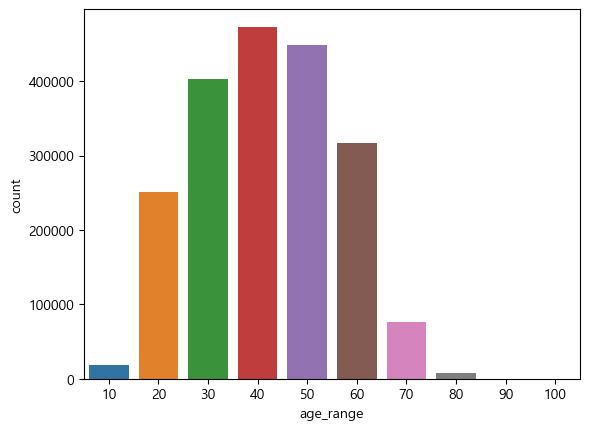

In [53]:
sns.countplot(data=buk, x="age_range")
plt.show()

In [54]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
buk_grouped = buk.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
buk_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

buk_grouped['월별요일별건별거래금액'] = buk_grouped.apply(custom_division, axis=1)

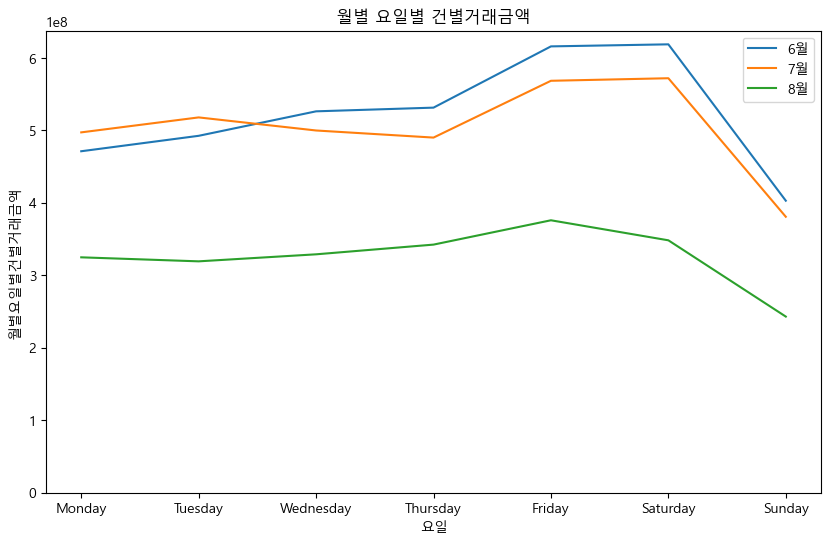

In [55]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(buk_grouped['월'].unique()):
    data = buk_grouped[buk_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

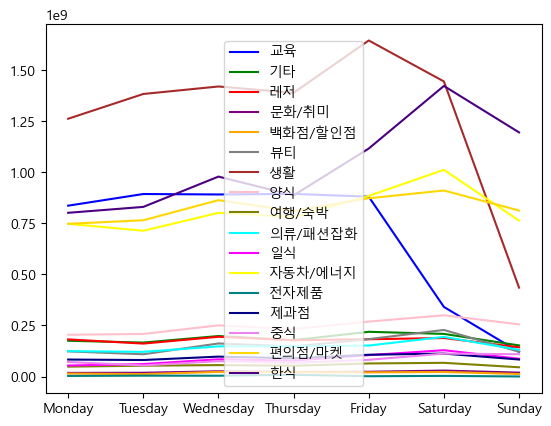

In [56]:
# 그룹화해서 건별거래금액의 합계 계산
grouped =buk.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 동래구

In [57]:
dong = df[df['시군구명']=='동래구']
dong

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
400,2022-06-01,0,동래구,코나,M,1,5100,Wednesday,60,편의점/마켓,5100.00,6
401,2022-06-01,0,동래구,코나,M,1,4500,Wednesday,60,편의점/마켓,4500.00,6
402,2022-06-01,0,동래구,코나,M,1,4500,Wednesday,50,편의점/마켓,4500.00,6
403,2022-06-01,0,동래구,코나,F,1,4300,Wednesday,40,편의점/마켓,4300.00,6
404,2022-06-01,0,동래구,코나,F,1,8500,Wednesday,30,편의점/마켓,8500.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27132946,2022-08-31,23,동래구,하나,F,1,1900,Wednesday,30,편의점/마켓,1900.00,8
27132947,2022-08-31,23,동래구,하나,M,1,7200,Wednesday,30,편의점/마켓,7200.00,8
27132948,2022-08-31,23,동래구,하나,M,1,25000,Wednesday,50,한식,25000.00,8
27132949,2022-08-31,23,동래구,하나,M,1,36800,Wednesday,30,한식,36800.00,8


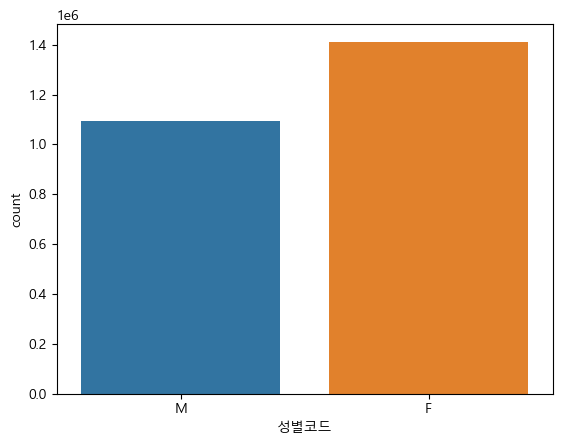

In [58]:
dong['성별코드'].value_counts()
sns.countplot(data=dong, x="성별코드")
plt.show()

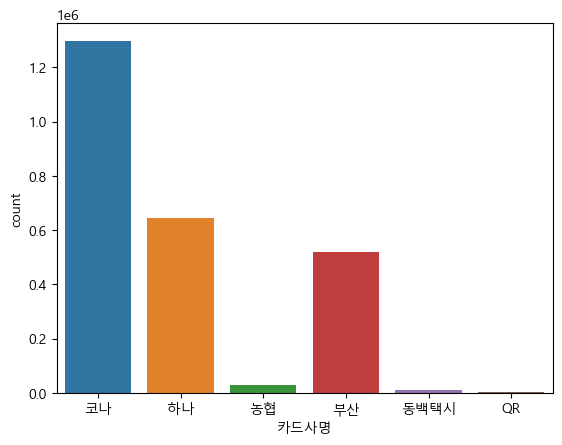

In [59]:
sns.countplot(data=dong, x="카드사명")
plt.show()

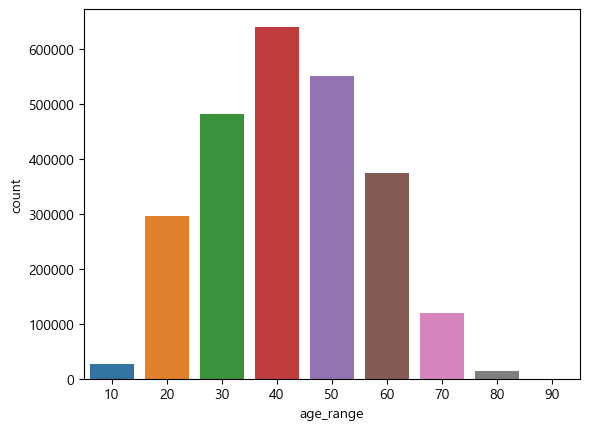

In [60]:
sns.countplot(data=dong, x="age_range")
plt.show()

In [61]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
dong_grouped = dong.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
dong_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

dong_grouped['월별요일별건별거래금액'] = dong_grouped.apply(custom_division, axis=1)

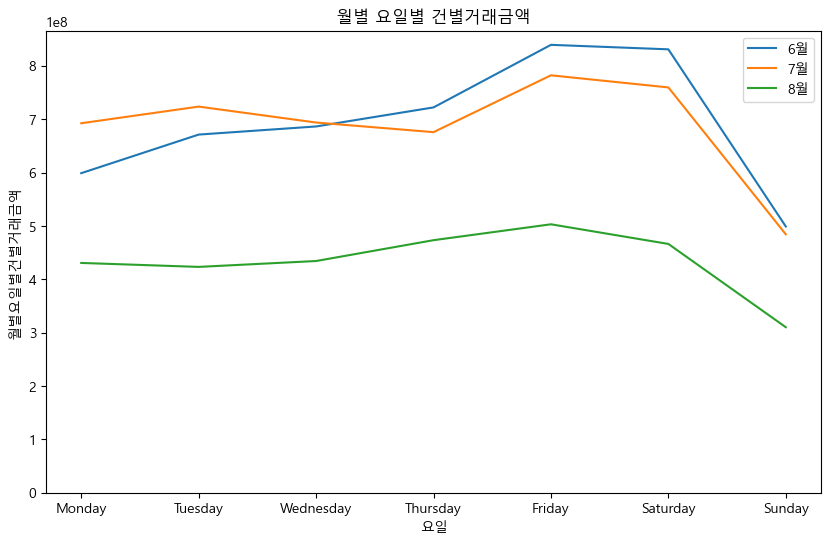

In [62]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(dong_grouped['월'].unique()):
    data = dong_grouped[dong_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

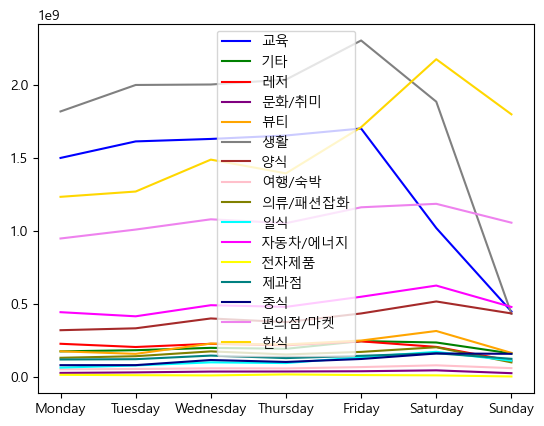

In [63]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = dong.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 남구

In [64]:
nam = df[df['시군구명']=='남구']
nam

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
557,2022-06-01,0,남구,농협,M,2,3920,Wednesday,20,편의점/마켓,1960.00,6
558,2022-06-01,0,남구,농협,F,1,3300,Wednesday,20,편의점/마켓,3300.00,6
559,2022-06-01,0,남구,농협,F,1,46900,Wednesday,20,한식,46900.00,6
560,2022-06-01,0,남구,부산,M,1,17000,Wednesday,20,레저,17000.00,6
561,2022-06-01,0,남구,부산,M,1,2000,Wednesday,20,레저,2000.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27134720,2022-08-31,14,남구,코나,M,1,50000,Wednesday,40,자동차/에너지,50000.00,8
27134721,2022-08-31,14,남구,코나,M,1,19800,Wednesday,40,편의점/마켓,19800.00,8
27134722,2022-08-31,14,남구,코나,M,1,23000,Wednesday,50,한식,23000.00,8
27134723,2022-08-31,14,남구,코나,M,1,7000,Wednesday,50,편의점/마켓,7000.00,8


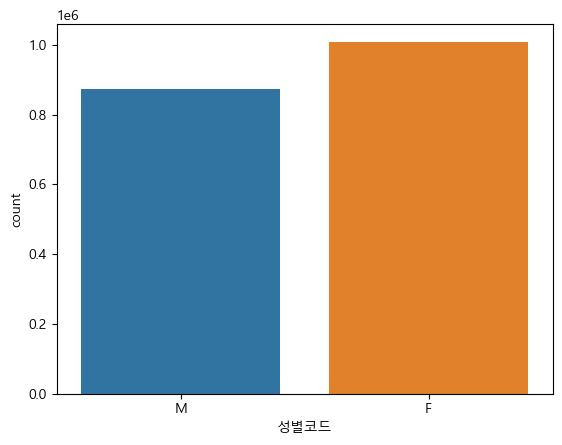

In [65]:
nam['성별코드'].value_counts()
sns.countplot(data=nam, x="성별코드")
plt.show()

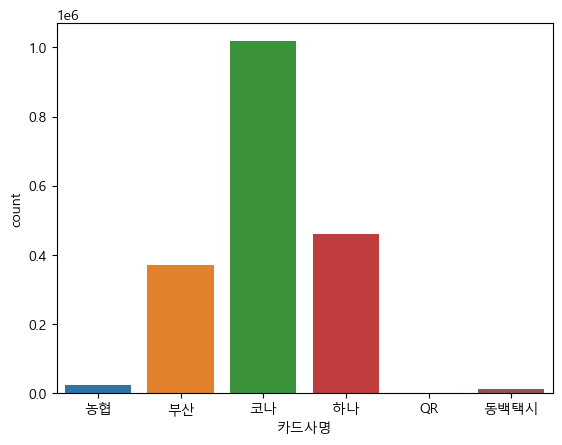

In [66]:
sns.countplot(data=nam, x="카드사명")
plt.show()

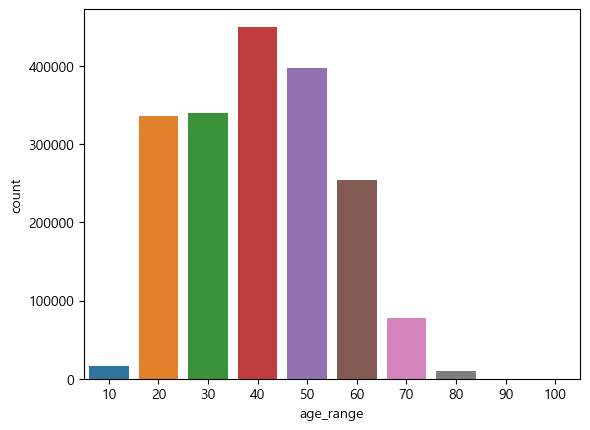

In [67]:
sns.countplot(data=nam, x="age_range")
plt.show()

In [68]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
nam_grouped = nam.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
nam_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

nam_grouped['월별요일별건별거래금액'] = nam_grouped.apply(custom_division, axis=1)

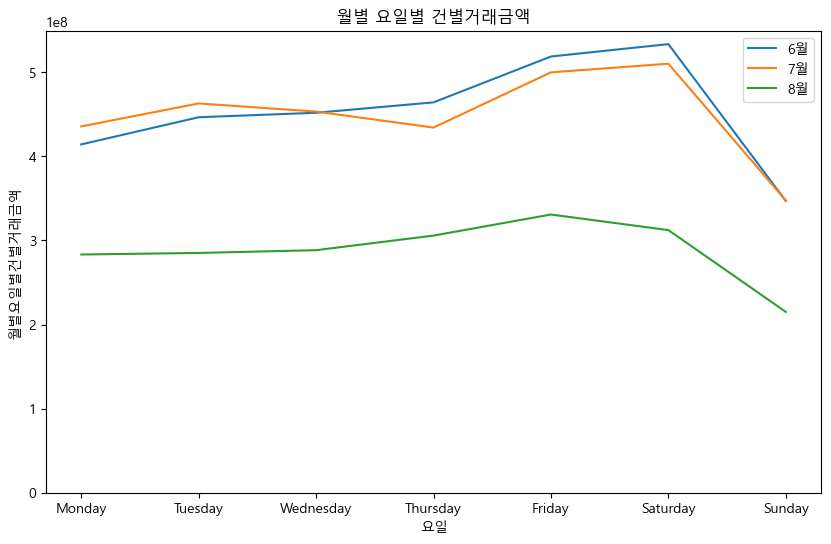

In [69]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(nam_grouped['월'].unique()):
    data = nam_grouped[nam_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

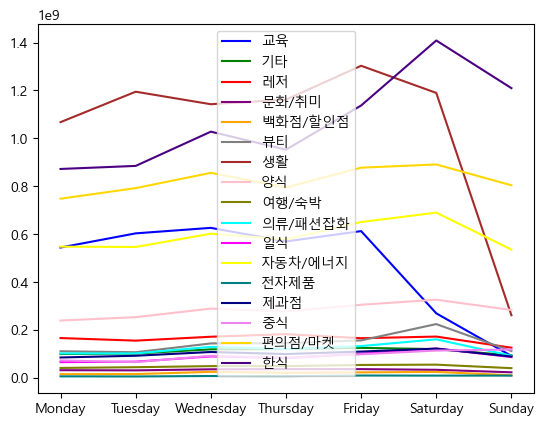

In [70]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = nam.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 금정구
40-50대보다 20대의 사용량이 가장 많은 구

In [71]:
gumj = df[df['시군구명']=='금정구']
gumj

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
1632,2022-06-01,0,금정구,부산,M,1,4200,Wednesday,30,편의점/마켓,4200.00,6
1633,2022-06-01,0,금정구,부산,M,1,6350,Wednesday,20,편의점/마켓,6350.00,6
1634,2022-06-01,0,금정구,코나,M,1,4500,Wednesday,40,편의점/마켓,4500.00,6
1635,2022-06-01,0,금정구,코나,M,1,1750,Wednesday,40,편의점/마켓,1750.00,6
1636,2022-06-01,0,금정구,코나,M,2,6900,Wednesday,30,편의점/마켓,3450.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27133812,2022-08-31,23,금정구,하나,M,1,950,Wednesday,20,편의점/마켓,950.00,8
27133813,2022-08-31,23,금정구,하나,F,1,44500,Wednesday,20,한식,44500.00,8
27133814,2022-08-31,23,금정구,하나,M,1,6200,Wednesday,20,양식,6200.00,8
27133815,2022-08-31,23,금정구,하나,M,1,36100,Wednesday,20,기타,36100.00,8


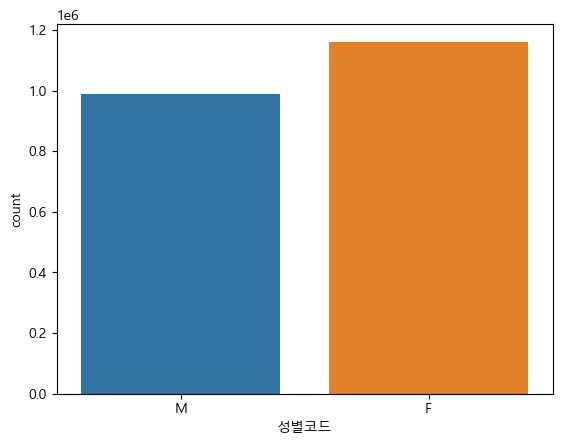

In [72]:
gumj['성별코드'].value_counts()
sns.countplot(data=gumj, x="성별코드")
plt.show()

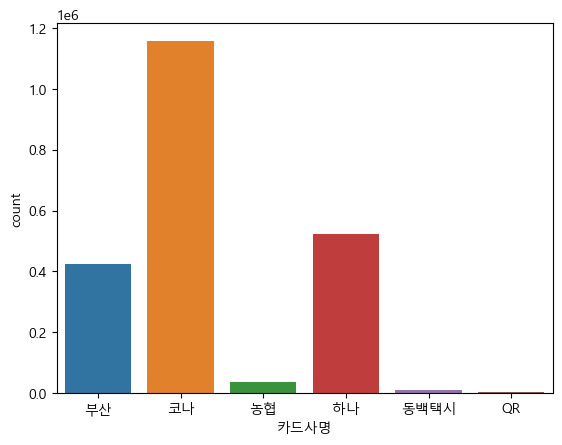

In [73]:
sns.countplot(data=gumj, x="카드사명")
plt.show()

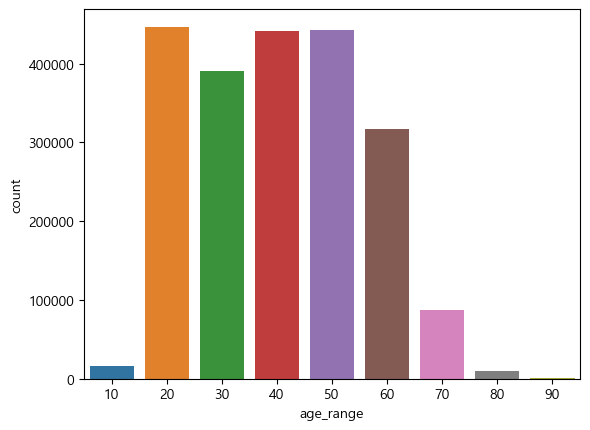

In [74]:
sns.countplot(data=gumj, x="age_range")
plt.show()

In [75]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
gumj_grouped = gumj.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
gumj_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

gumj_grouped['월별요일별건별거래금액'] = gumj_grouped.apply(custom_division, axis=1)

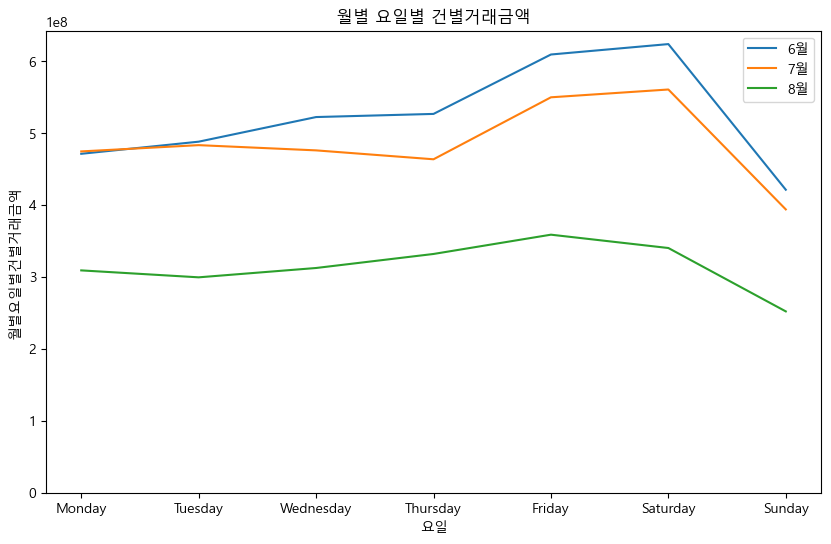

In [76]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(gumj_grouped['월'].unique()):
    data = gumj_grouped[gumj_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

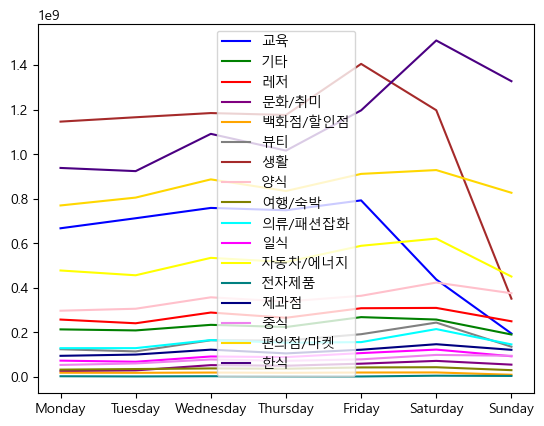

In [77]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = gumj.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 사상구

In [78]:
sasang = df[df['시군구명']=='사상구']
sasang

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
2520,2022-06-01,0,사상구,동백택시,M,1,13200,Wednesday,30,여행/숙박,13200.00,6
2521,2022-06-01,0,사상구,부산,M,1,4560,Wednesday,60,여행/숙박,4560.00,6
2522,2022-06-01,0,사상구,부산,M,1,6100,Wednesday,20,편의점/마켓,6100.00,6
2523,2022-06-01,0,사상구,부산,M,1,5500,Wednesday,20,일식,5500.00,6
2524,2022-06-01,0,사상구,코나,M,1,3000,Wednesday,30,레저,3000.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27134270,2022-08-31,23,사상구,코나,M,1,4600,Wednesday,30,여행/숙박,4600.00,8
27134271,2022-08-31,23,사상구,코나,M,1,11700,Wednesday,40,편의점/마켓,11700.00,8
27134272,2022-08-31,23,사상구,코나,F,1,4700,Wednesday,20,편의점/마켓,4700.00,8
27134273,2022-08-31,23,사상구,하나,M,1,7800,Wednesday,40,여행/숙박,7800.00,8


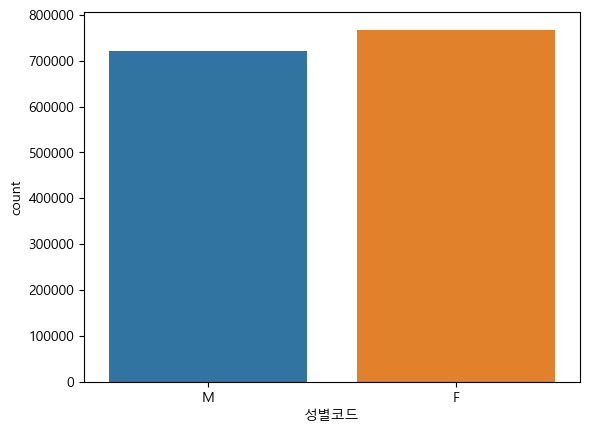

In [79]:
sasang['성별코드'].value_counts()
sns.countplot(data=sasang, x="성별코드")
plt.show()

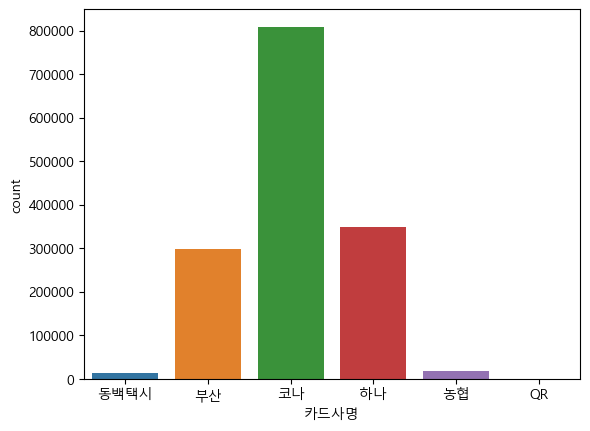

In [80]:
sns.countplot(data=sasang, x="카드사명")
plt.show()

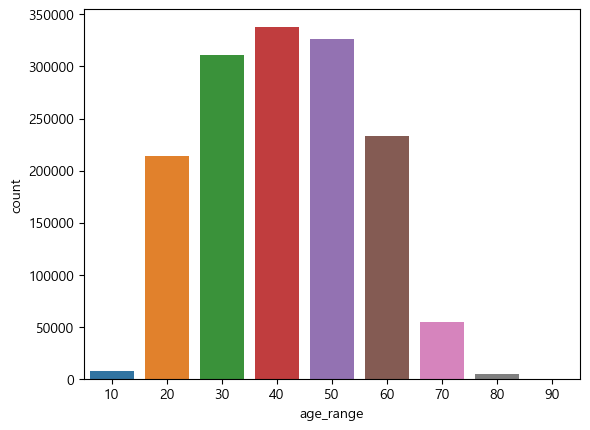

In [81]:
sns.countplot(data=sasang, x="age_range")
plt.show()

In [82]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
sasang_grouped = sasang.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
sasang_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

sasang_grouped['월별요일별건별거래금액'] = sasang_grouped.apply(custom_division, axis=1)

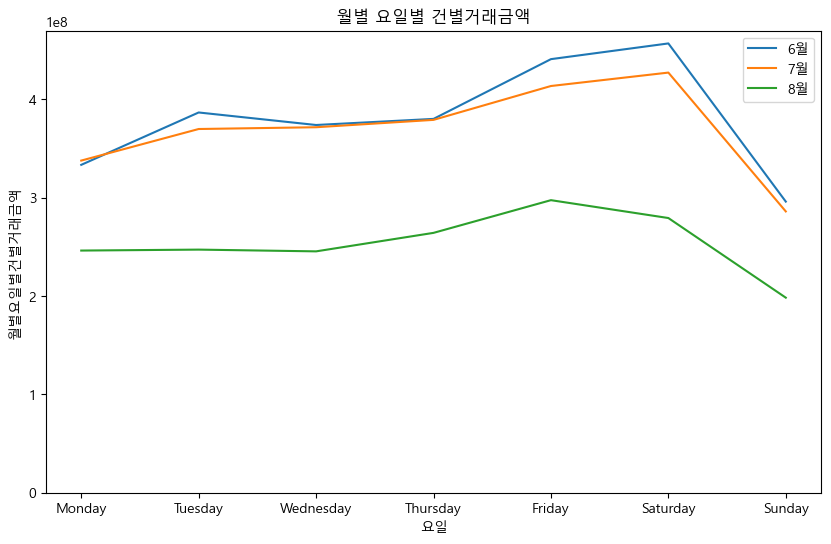

In [83]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(sasang_grouped['월'].unique()):
    data = sasang_grouped[sasang_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

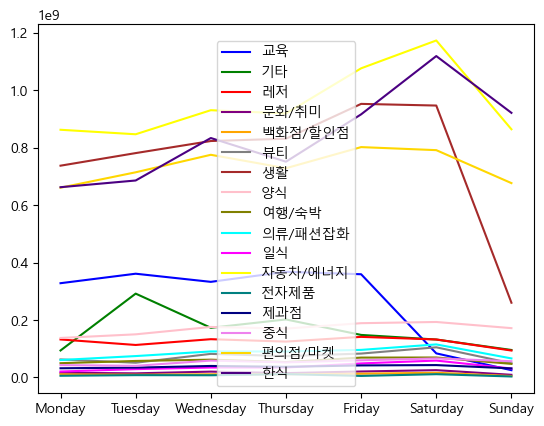

In [84]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = sasang.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 연제구

In [85]:
yj = df[df['시군구명']=='연제구']
yj

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
2002,2022-06-01,0,연제구,동백택시,F,1,14280,Wednesday,50,여행/숙박,14280.00,6
2003,2022-06-01,0,연제구,부산,M,1,4800,Wednesday,50,편의점/마켓,4800.00,6
2004,2022-06-01,0,연제구,부산,M,1,7000,Wednesday,50,편의점/마켓,7000.00,6
2005,2022-06-01,0,연제구,부산,M,1,3400,Wednesday,40,편의점/마켓,3400.00,6
2006,2022-06-01,0,연제구,부산,M,2,6200,Wednesday,30,편의점/마켓,3100.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27134020,2022-08-31,23,연제구,하나,F,1,2100,Wednesday,40,편의점/마켓,2100.00,8
27134021,2022-08-31,23,연제구,하나,M,1,5100,Wednesday,30,편의점/마켓,5100.00,8
27134022,2022-08-31,23,연제구,하나,M,1,6000,Wednesday,20,편의점/마켓,6000.00,8
27134023,2022-08-31,23,연제구,하나,F,1,4580,Wednesday,60,편의점/마켓,4580.00,8


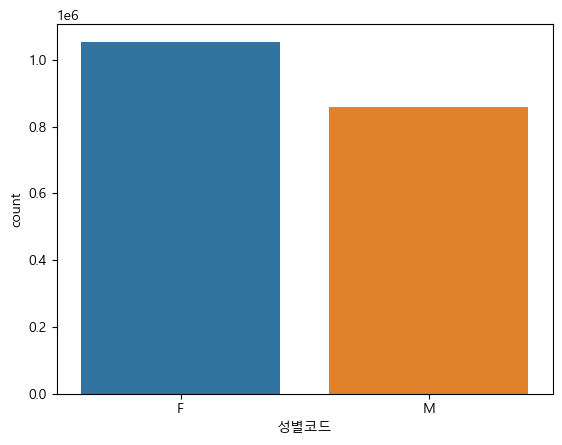

In [86]:
yj['성별코드'].value_counts()
sns.countplot(data=yj, x="성별코드")
plt.show()

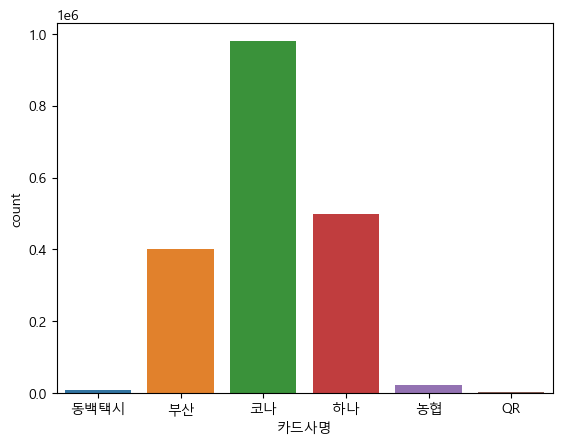

In [87]:
sns.countplot(data=yj, x="카드사명")
plt.show()

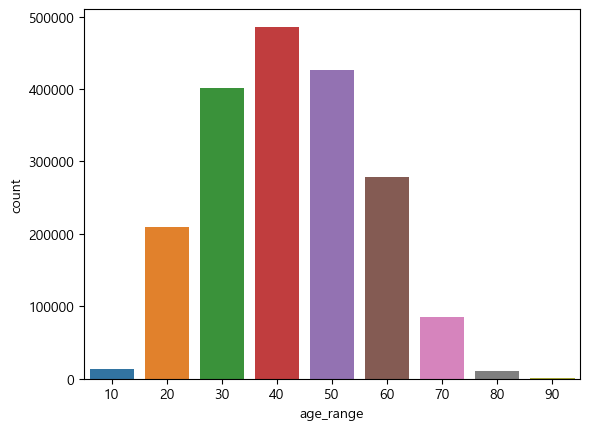

In [88]:
sns.countplot(data=yj, x="age_range")
plt.show()

In [89]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
yj_grouped = yj.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
yj_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

yj_grouped['월별요일별건별거래금액'] = yj_grouped.apply(custom_division, axis=1)

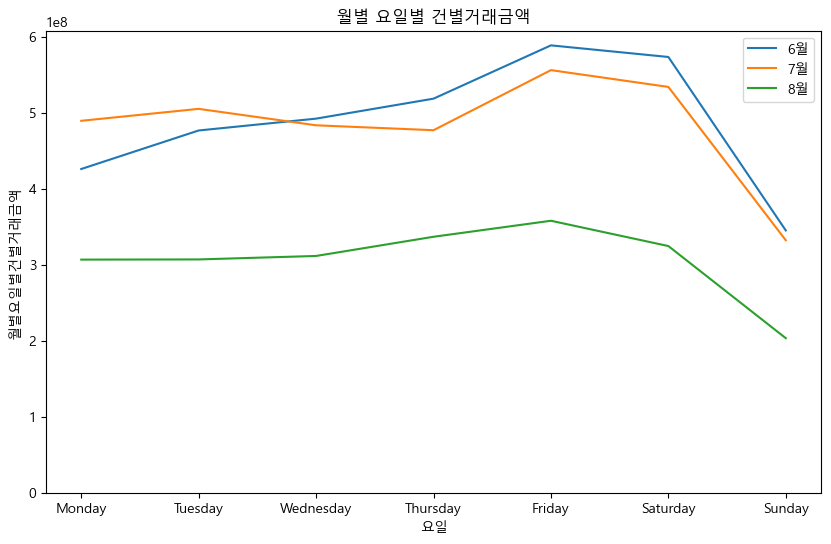

In [90]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(yj_grouped['월'].unique()):
    data = yj_grouped[yj_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

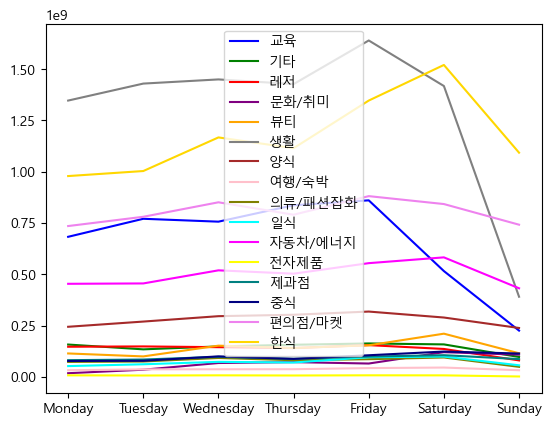

In [91]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = yj.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 기장군

In [92]:
gij = df[df['시군구명']=='기장군']
gij

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
2685,2022-06-01,0,기장군,동백택시,M,1,25200,Wednesday,40,여행/숙박,25200.00,6
2686,2022-06-01,0,기장군,부산,M,1,19150,Wednesday,40,편의점/마켓,19150.00,6
2687,2022-06-01,0,기장군,부산,F,1,42000,Wednesday,50,한식,42000.00,6
2688,2022-06-01,0,기장군,코나,F,1,5880,Wednesday,50,여행/숙박,5880.00,6
2689,2022-06-01,0,기장군,코나,M,2,2000,Wednesday,20,레저,1000.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27134325,2022-08-31,23,기장군,하나,M,1,36100,Wednesday,30,한식,36100.00,8
27134326,2022-08-31,23,기장군,하나,M,1,3600,Wednesday,30,양식,3600.00,8
27134327,2022-08-31,23,기장군,하나,M,1,1000,Wednesday,50,생활,1000.00,8
27134328,2022-08-31,23,기장군,하나,F,1,1600,Wednesday,20,생활,1600.00,8


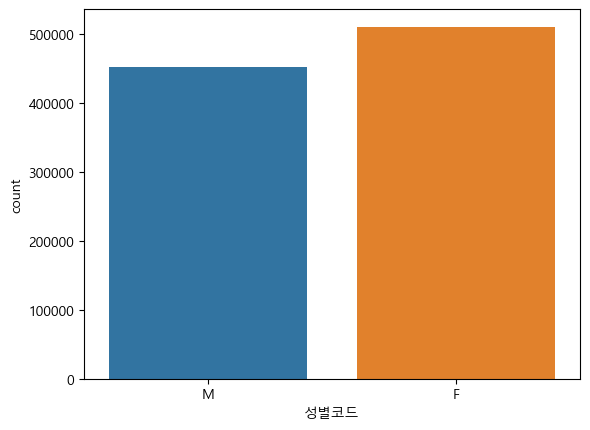

In [93]:
gij['성별코드'].value_counts()
sns.countplot(data=gij, x="성별코드")
plt.show()

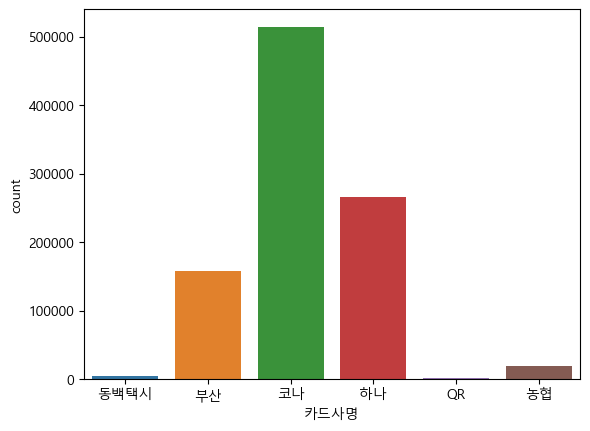

In [94]:
sns.countplot(data=gij, x="카드사명")
plt.show()

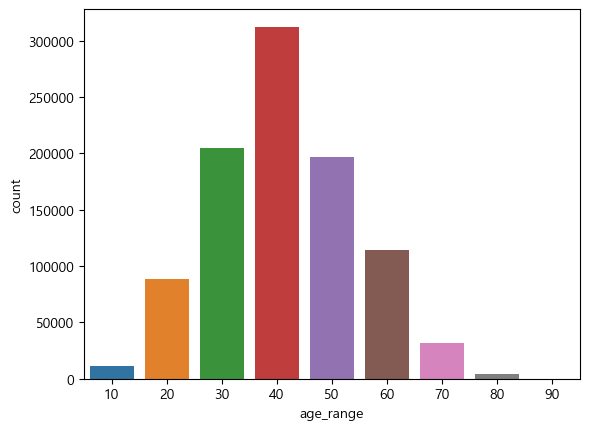

In [95]:
sns.countplot(data=gij, x="age_range")
plt.show()

In [96]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
gij_grouped = gij.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
gij_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

gij_grouped['월별요일별건별거래금액'] = gij_grouped.apply(custom_division, axis=1)

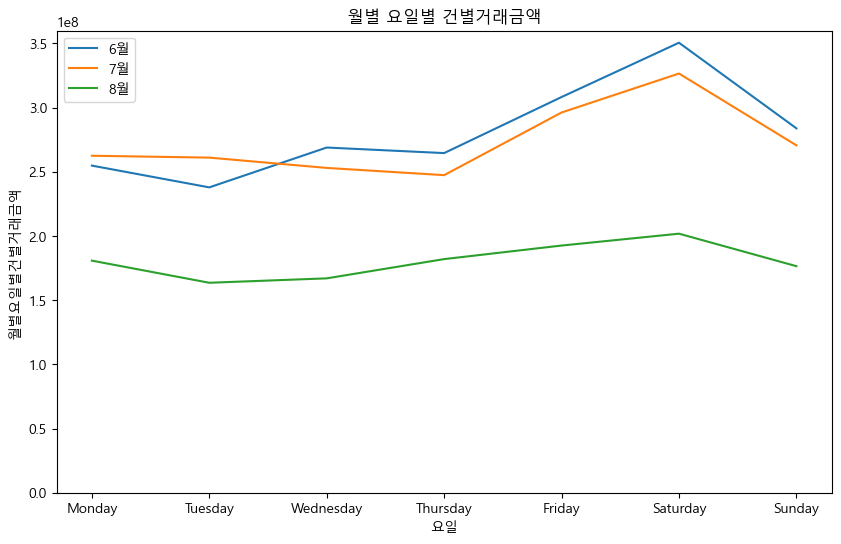

In [97]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(gij_grouped['월'].unique()):
    data = gij_grouped[gij_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

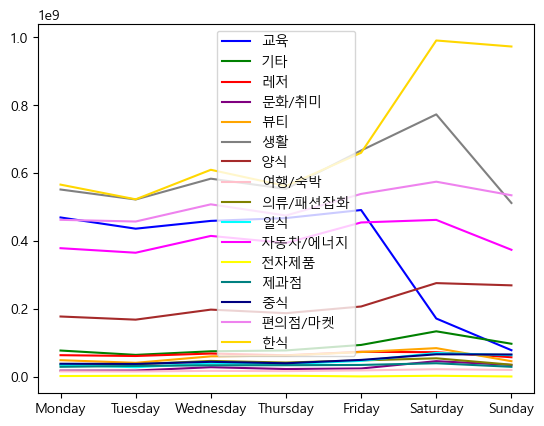

In [98]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = gij.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 수영구

In [99]:
suy = df[df['시군구명']=='수영구']
suy

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
2257,2022-06-01,0,수영구,부산,M,1,18900,Wednesday,30,편의점/마켓,18900.00,6
2258,2022-06-01,0,수영구,부산,M,1,1800,Wednesday,30,편의점/마켓,1800.00,6
2259,2022-06-01,0,수영구,부산,M,1,17200,Wednesday,40,양식,17200.00,6
2260,2022-06-01,0,수영구,코나,M,1,8880,Wednesday,20,여행/숙박,8880.00,6
2261,2022-06-01,0,수영구,코나,M,1,23300,Wednesday,60,편의점/마켓,23300.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27134136,2022-08-31,23,수영구,하나,M,1,4500,Wednesday,30,편의점/마켓,4500.00,8
27134137,2022-08-31,23,수영구,하나,F,1,500,Wednesday,30,편의점/마켓,500.00,8
27134138,2022-08-31,23,수영구,하나,F,1,2600,Wednesday,20,편의점/마켓,2600.00,8
27134139,2022-08-31,23,수영구,하나,F,1,199000,Wednesday,30,한식,199000.00,8


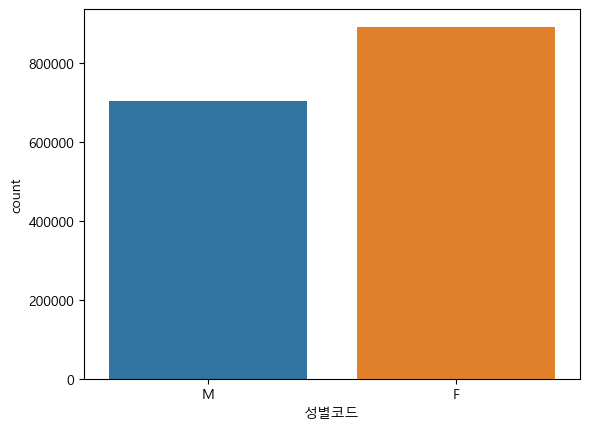

In [100]:
suy['성별코드'].value_counts()
sns.countplot(data=suy, x="성별코드")
plt.show()

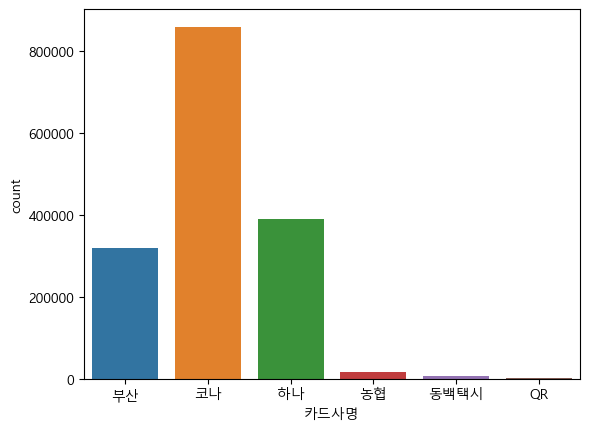

In [101]:
sns.countplot(data=suy, x="카드사명")
plt.show()

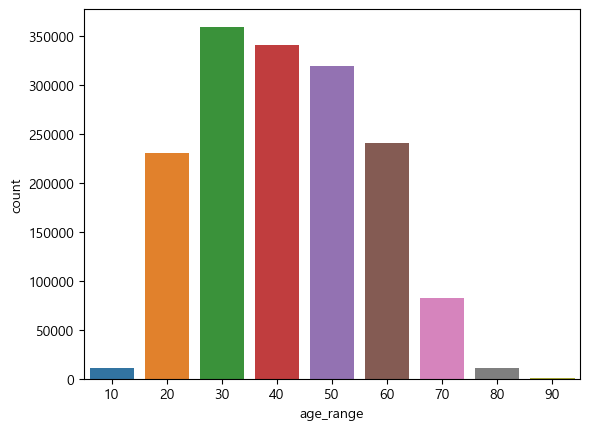

In [102]:
sns.countplot(data=suy, x="age_range")
plt.show()

In [103]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
suy_grouped = suy.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
suy_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

suy_grouped['월별요일별건별거래금액'] = suy_grouped.apply(custom_division, axis=1)

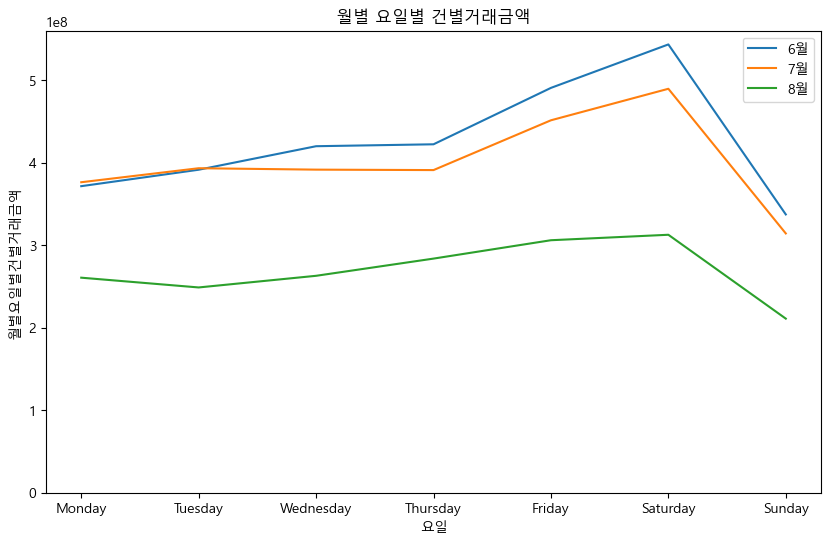

In [104]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(suy_grouped['월'].unique()):
    data = suy_grouped[suy_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

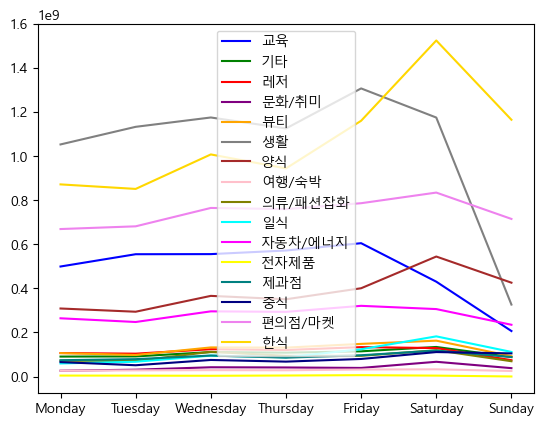

In [105]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = suy.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 강서구
30-40대가 압도적으로 많고, 다른 구에 비해 50-60대가 적다

In [106]:
gangsu = df[df['시군구명']=='강서구']
gangsu

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
1909,2022-06-01,0,강서구,코나,M,1,80000,Wednesday,20,자동차/에너지,80000.00,6
1910,2022-06-01,0,강서구,코나,M,1,39160,Wednesday,30,자동차/에너지,39160.00,6
1911,2022-06-01,0,강서구,코나,M,1,11800,Wednesday,50,편의점/마켓,11800.00,6
1912,2022-06-01,0,강서구,코나,M,1,1100,Wednesday,20,편의점/마켓,1100.00,6
1913,2022-06-01,0,강서구,코나,M,1,14900,Wednesday,40,생활,14900.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27133867,2022-08-31,23,강서구,하나,M,1,11300,Wednesday,50,편의점/마켓,11300.00,8
27133868,2022-08-31,23,강서구,하나,M,1,3200,Wednesday,50,편의점/마켓,3200.00,8
27133869,2022-08-31,23,강서구,하나,M,1,2200,Wednesday,30,편의점/마켓,2200.00,8
27133870,2022-08-31,23,강서구,하나,M,1,15900,Wednesday,50,편의점/마켓,15900.00,8


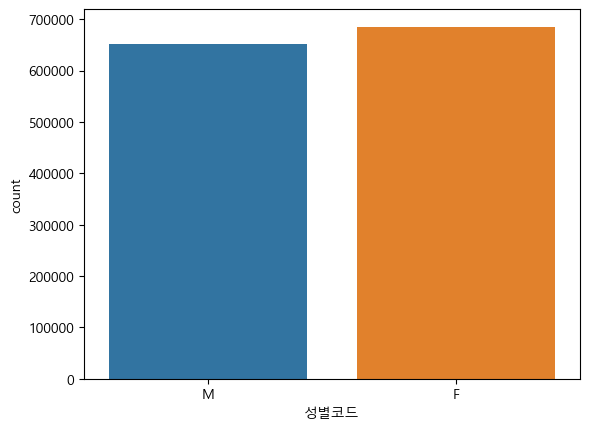

In [107]:
gangsu['성별코드'].value_counts()
sns.countplot(data=gangsu, x="성별코드")
plt.show()

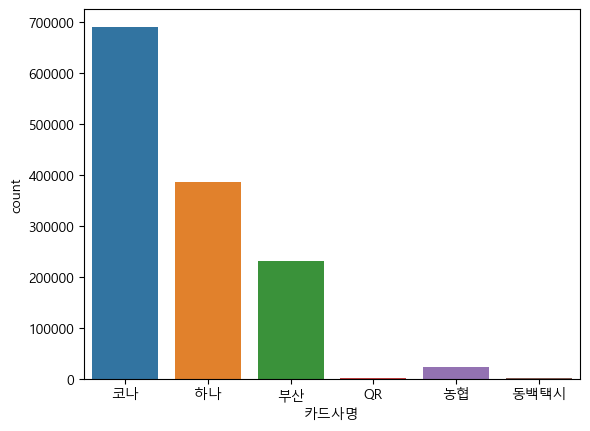

In [108]:
sns.countplot(data=gangsu, x="카드사명")
plt.show()

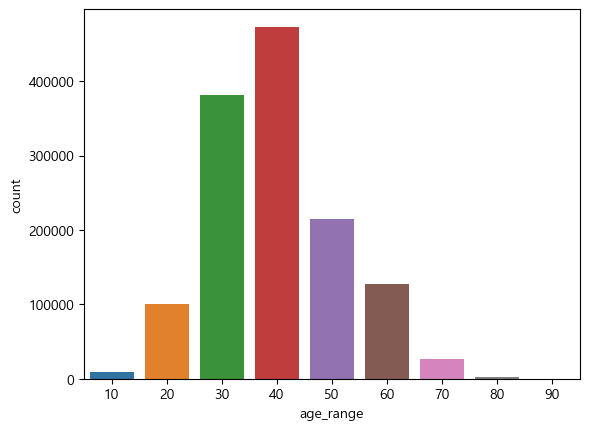

In [109]:
sns.countplot(data=gangsu, x="age_range")
plt.show()

In [110]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
gangsu_grouped = gangsu.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
gangsu_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

gangsu_grouped['월별요일별건별거래금액'] = gangsu_grouped.apply(custom_division, axis=1)

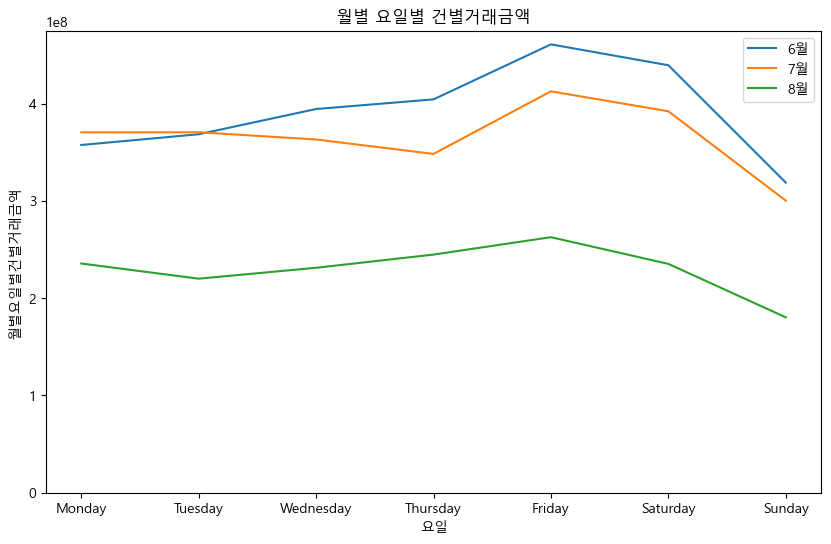

In [111]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(gangsu_grouped['월'].unique()):
    data = gangsu_grouped[gangsu_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

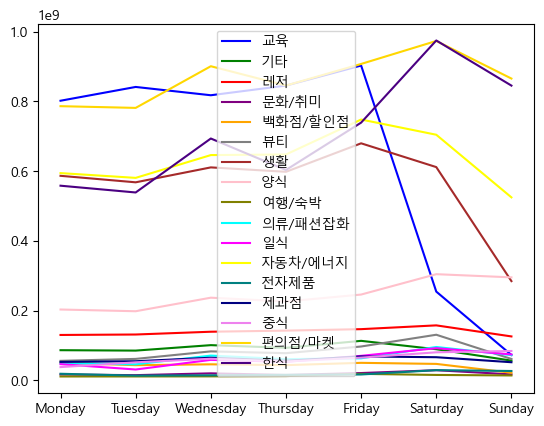

In [112]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = gangsu.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 영도구

In [113]:
yd = df[df['시군구명']=='영도구']
yd

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
79,2022-06-01,0,영도구,코나,M,1,10720,Wednesday,40,여행/숙박,10720.00,6
80,2022-06-01,0,영도구,코나,M,1,2500,Wednesday,20,레저,2500.00,6
81,2022-06-01,0,영도구,코나,M,1,4100,Wednesday,40,편의점/마켓,4100.00,6
82,2022-06-01,0,영도구,코나,M,1,4500,Wednesday,20,편의점/마켓,4500.00,6
83,2022-06-01,0,영도구,코나,M,1,4500,Wednesday,40,편의점/마켓,4500.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27134903,2022-08-01,0,영도구,코나,M,1,30000,Monday,60,편의점/마켓,30000.00,8
27134904,2022-08-01,0,영도구,코나,M,1,59600,Monday,20,기타,59600.00,8
27134905,2022-08-01,0,영도구,코나,F,1,7500,Monday,20,생활,7500.00,8
27134906,2022-08-01,0,영도구,하나,F,2,7600,Monday,50,편의점/마켓,3800.00,8


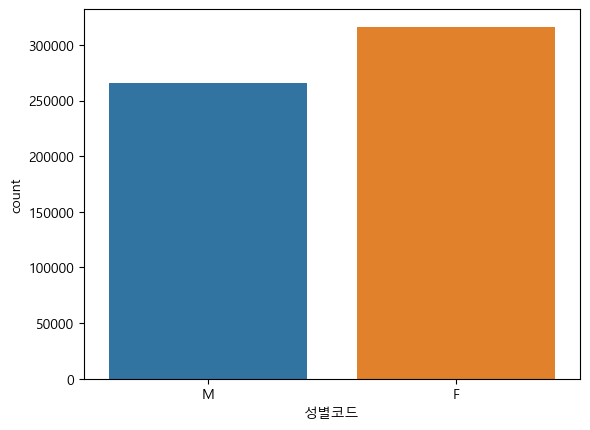

In [114]:
yd['성별코드'].value_counts()
sns.countplot(data=yd, x="성별코드")
plt.show()

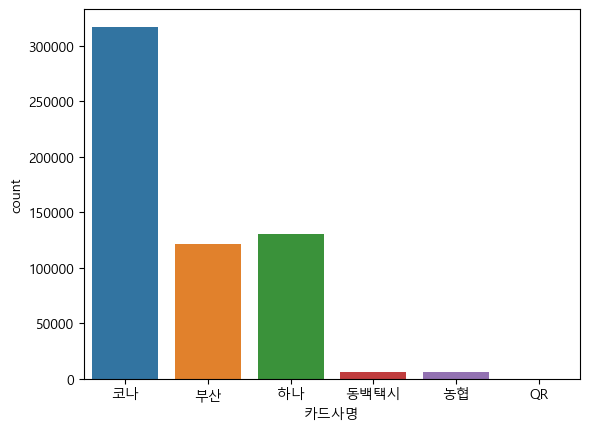

In [115]:
sns.countplot(data=yd, x="카드사명")
plt.show()

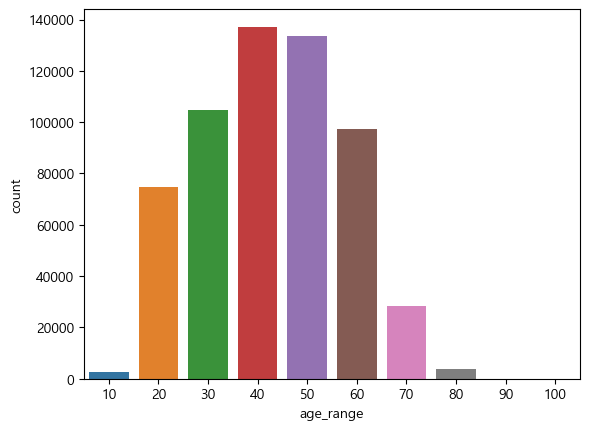

In [116]:
sns.countplot(data=yd, x="age_range")
plt.show()

In [117]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
yd_grouped = yd.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
yd_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

yd_grouped['월별요일별건별거래금액'] = yd_grouped.apply(custom_division, axis=1)

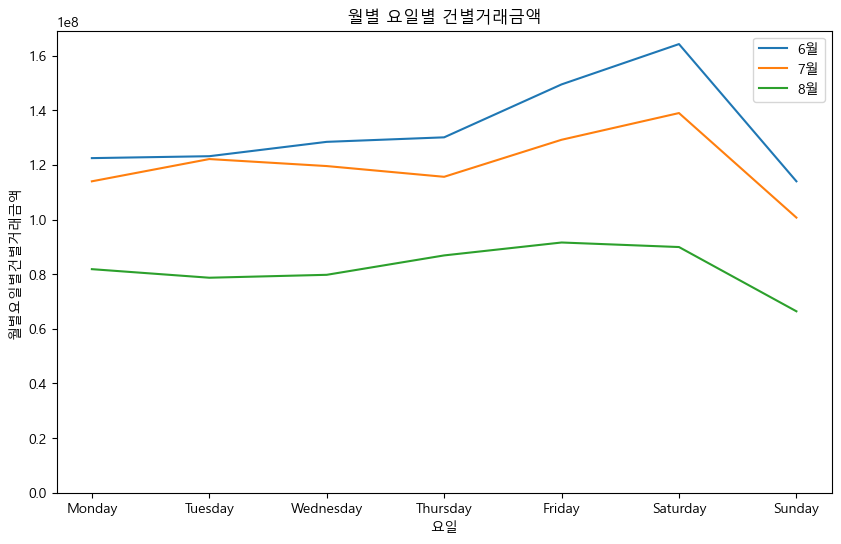

In [118]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(yd_grouped['월'].unique()):
    data = yd_grouped[yd_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

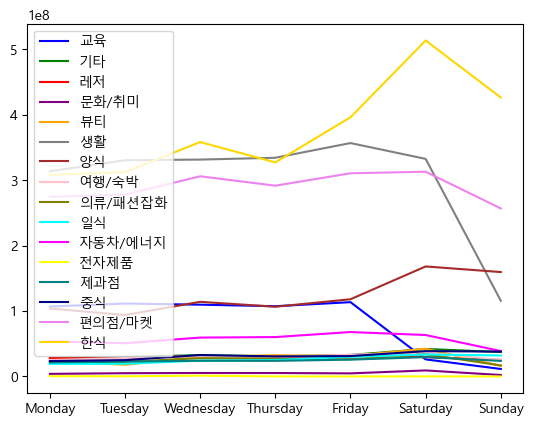

In [119]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = yd.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 서구

In [120]:
seo = df[df['시군구명']=='서구']
seo

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
20,2022-06-01,0,서구,코나,M,1,43000,Wednesday,20,생활,43000.00,6
21,2022-06-01,0,서구,코나,M,1,19000,Wednesday,50,생활,19000.00,6
22,2022-06-01,0,서구,하나,M,1,4500,Wednesday,50,편의점/마켓,4500.00,6
23,2022-06-01,0,서구,코나,M,1,9000,Wednesday,40,편의점/마켓,9000.00,6
24,2022-06-01,0,서구,하나,M,1,6900,Wednesday,50,편의점/마켓,6900.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27132312,2022-08-31,23,서구,코나,M,1,2400,Wednesday,20,편의점/마켓,2400.00,8
27132313,2022-08-31,23,서구,코나,M,1,3900,Wednesday,30,편의점/마켓,3900.00,8
27132314,2022-08-31,23,서구,코나,F,1,39780,Wednesday,20,편의점/마켓,39780.00,8
27132315,2022-08-31,23,서구,하나,M,1,19400,Wednesday,20,양식,19400.00,8


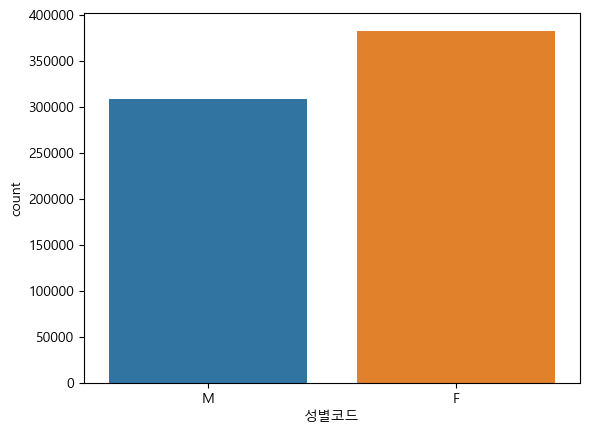

In [121]:
seo['성별코드'].value_counts()
sns.countplot(data=seo, x="성별코드")
plt.show()

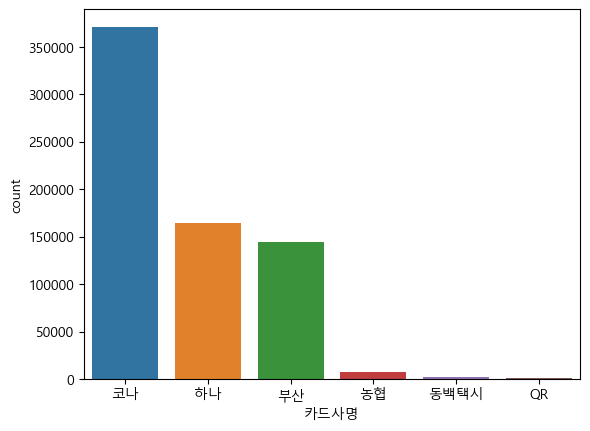

In [122]:
sns.countplot(data=seo, x="카드사명")
plt.show()

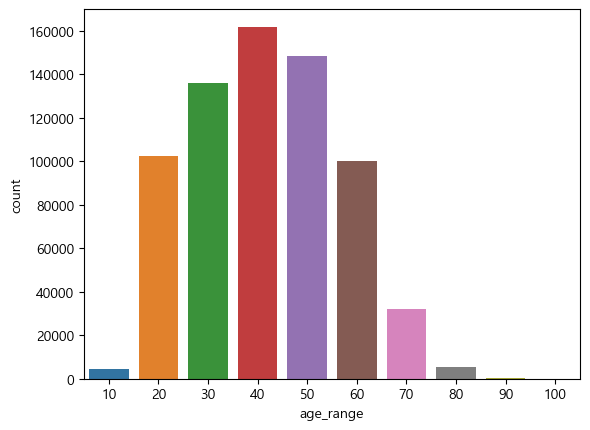

In [123]:
sns.countplot(data=seo, x="age_range")
plt.show()

In [124]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
seo_grouped = seo.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
seo_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

seo_grouped['월별요일별건별거래금액'] = seo_grouped.apply(custom_division, axis=1)

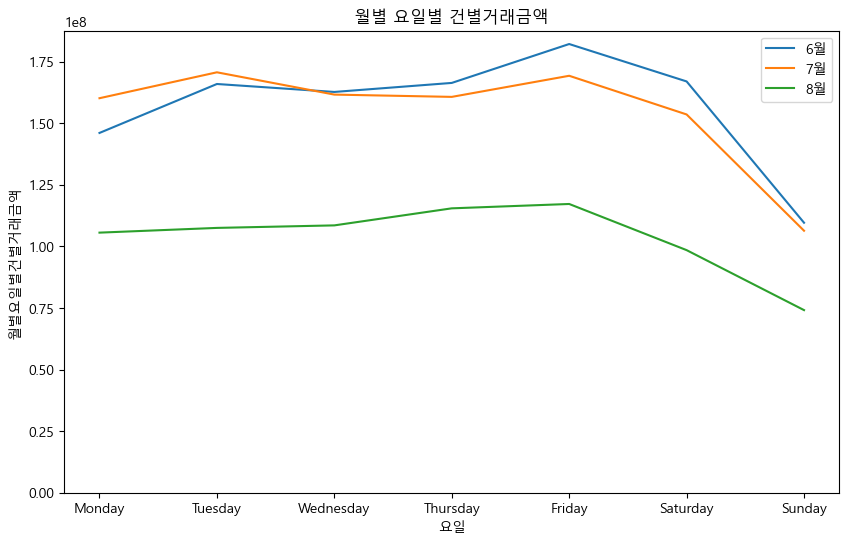

In [125]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(seo_grouped['월'].unique()):
    data = seo_grouped[seo_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

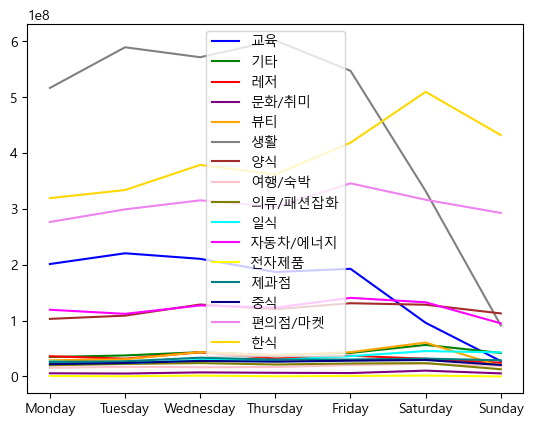

In [126]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = seo.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 동구

In [127]:
donggu = df[df['시군구명']=='동구']
donggu

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
65,2022-06-01,0,동구,부산,F,1,6720,Wednesday,60,여행/숙박,6720.00,6
66,2022-06-01,0,동구,코나,M,1,11000,Wednesday,50,편의점/마켓,11000.00,6
67,2022-06-01,0,동구,코나,M,1,11800,Wednesday,20,편의점/마켓,11800.00,6
68,2022-06-01,0,동구,코나,M,1,11000,Wednesday,20,한식,11000.00,6
69,2022-06-01,0,동구,하나,M,1,15000,Wednesday,20,편의점/마켓,15000.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27134879,2022-08-01,0,동구,동백택시,M,1,7920,Monday,50,여행/숙박,7920.00,8
27134880,2022-08-01,0,동구,코나,F,1,3100,Monday,30,편의점/마켓,3100.00,8
27134881,2022-08-01,0,동구,하나,M,1,15480,Monday,20,여행/숙박,15480.00,8
27134882,2022-08-01,0,동구,부산,M,1,9000,Monday,60,편의점/마켓,9000.00,8


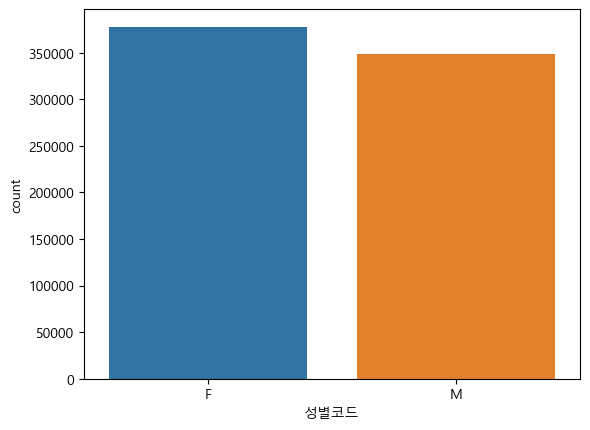

In [128]:
donggu['성별코드'].value_counts()
sns.countplot(data=donggu, x="성별코드")
plt.show()

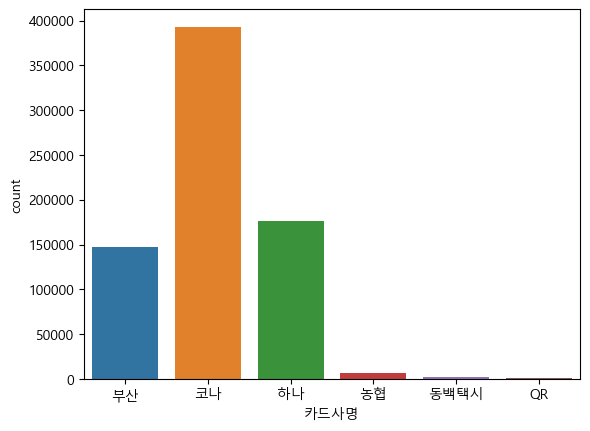

In [129]:
sns.countplot(data=donggu, x="카드사명")
plt.show()

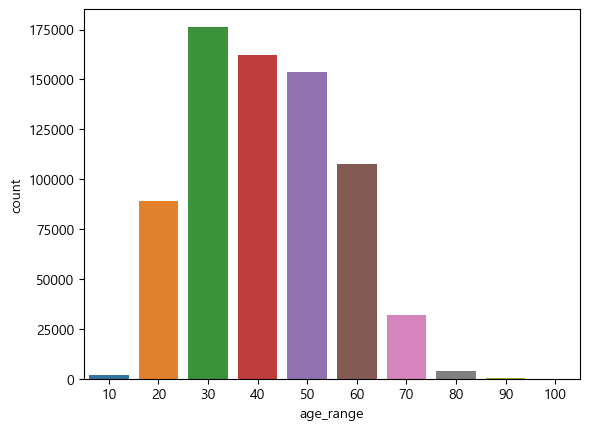

In [130]:
sns.countplot(data=donggu, x="age_range")
plt.show()

In [131]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
donggu_grouped = donggu.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
donggu_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

donggu_grouped['월별요일별건별거래금액'] = donggu_grouped.apply(custom_division, axis=1)

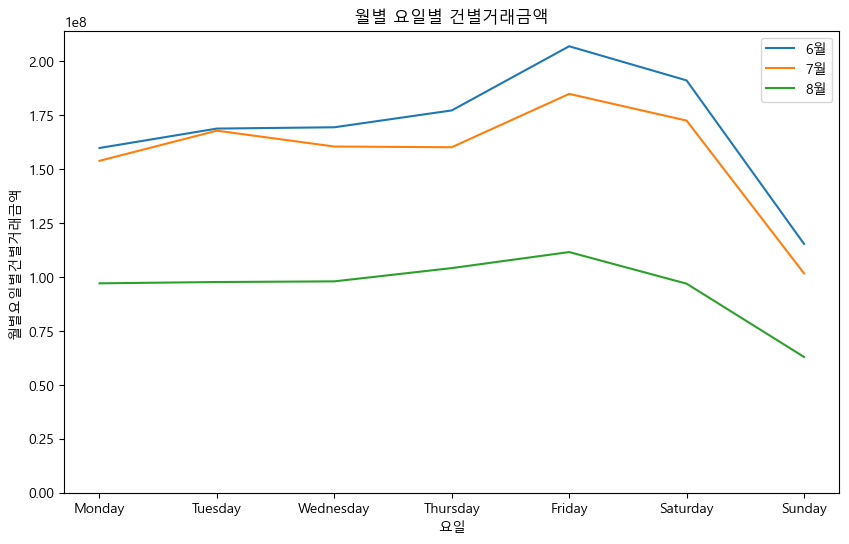

In [132]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(donggu_grouped['월'].unique()):
    data = donggu_grouped[donggu_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

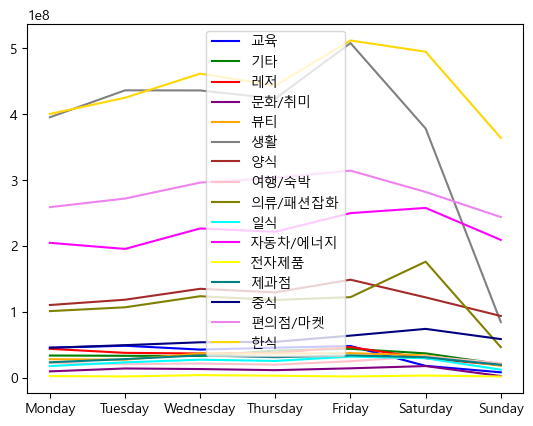

In [133]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = donggu.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()

## 중구

In [134]:
junggu = df[df['시군구명']=='중구']
junggu

,기준일자,기준시간대값,시군구명,카드사명,성별코드,거래건수,총거래금액,요일,age_range,중분류,건별거래금액,월
0,2022-06-01,0,중구,코나,M,1,7350,Wednesday,50,편의점/마켓,7350.00,6
1,2022-06-01,0,중구,부산,F,1,3700,Wednesday,40,편의점/마켓,3700.00,6
2,2022-06-01,0,중구,부산,M,1,7500,Wednesday,30,편의점/마켓,7500.00,6
3,2022-06-01,0,중구,부산,M,1,2700,Wednesday,20,편의점/마켓,2700.00,6
4,2022-06-01,0,중구,코나,M,1,13900,Wednesday,40,편의점/마켓,13900.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
27132272,2022-08-31,23,중구,코나,M,1,4500,Wednesday,30,편의점/마켓,4500.00,8
27132273,2022-08-31,23,중구,코나,M,1,5200,Wednesday,20,편의점/마켓,5200.00,8
27132274,2022-08-31,23,중구,코나,F,1,1600,Wednesday,40,편의점/마켓,1600.00,8
27132275,2022-08-31,23,중구,코나,F,1,5200,Wednesday,30,편의점/마켓,5200.00,8


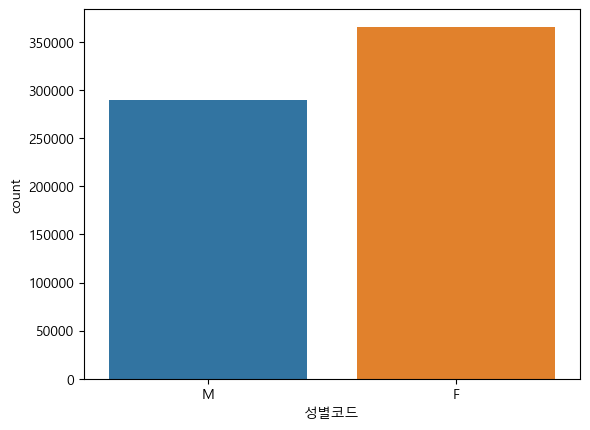

In [135]:
junggu['성별코드'].value_counts()
sns.countplot(data=junggu, x="성별코드")
plt.show()

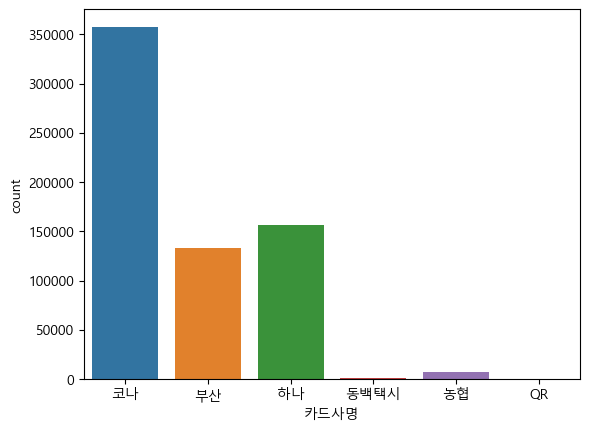

In [136]:
sns.countplot(data=junggu, x="카드사명")
plt.show()

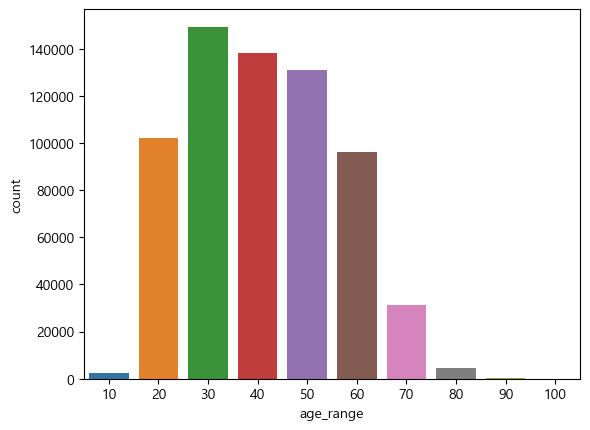

In [137]:
sns.countplot(data=junggu, x="age_range")
plt.show()

In [138]:
#요일 별 건별거래금액 보기 위해 주 개수로 나눠줌
pd.set_option('display.float_format', '{:.2f}'.format)
junggu_grouped = junggu.groupby(['월', '요일'])['건별거래금액'].sum().reset_index()
junggu_grouped['월별요일별건별거래금액'] = 0  # '월별요일별거래건수' 열 초기화

def custom_division(row):
    month = row['월']
    day = row['요일']
    count = row['건별거래금액']  # '거래건수' 열을 기준으로 나눔
    
    if month == 6:
        if day in ['Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']:
            return count // 4
        else:
            return count // 5
    elif month == 7:
        if day in ['Friday', 'Saturday', 'Sunday']:
            return count // 5
        else:
            return count // 4
    elif month == 8:
        if day in ['Monday', 'Tuesday', 'Wednesday']:
            return count // 5
        else:
            return count // 4
    else:
        return count

junggu_grouped['월별요일별건별거래금액'] = junggu_grouped.apply(custom_division, axis=1)

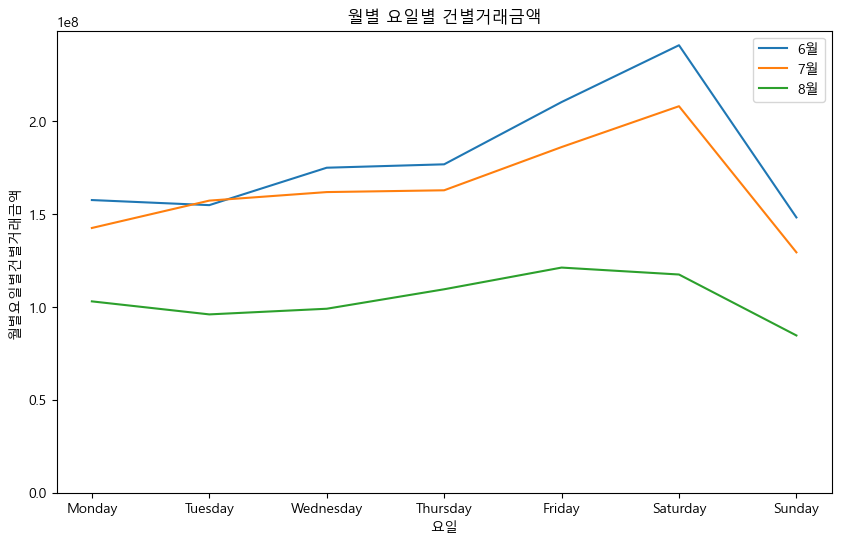

In [139]:
#그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for month in sorted(junggu_grouped['월'].unique()):
    data = junggu_grouped[junggu_grouped['월'] == month]
    ax.plot(data['요일'], data['월별요일별건별거래금액'], label=f'{month}월')
ax.set_xlabel('요일')
ax.set_ylabel('월별요일별건별거래금액')
ax.set_title('월별 요일별 건별거래금액')
ax.legend()
ax.set_ylim(bottom=0)  # y축이 0부터 시작하도록 함
plt.show()

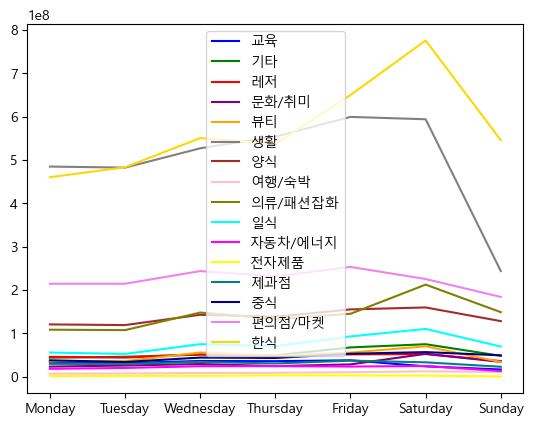

In [140]:
# 그룹화해서 건별거래금액의 합계 계산
grouped = junggu.groupby(['중분류', '요일'])['건별거래금액'].sum().reset_index()

# 색상 리스트 생성
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'violet', 'gold', 'indigo', 'crimson']

# 그래프 그리기
for i, category in enumerate(grouped['중분류'].unique()):
    subset = grouped[grouped['중분류'] == category]
    plt.plot(subset['요일'], subset['건별거래금액'], label=category, color=color_list[i%len(color_list)])

plt.legend()
plt.show()